# EDA and Preprocessing

In [1]:
import pandas as pd
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load CSV data

In [2]:
# Reading demographic csv
demo_df = pd.read_csv('../Dataset/Demographic_CSV/DEMO.csv')

# Reading examination csv
ex_df = pd.read_csv('../Dataset/Examination_CSV/BMX_J.csv')

# Loading the lab csv files 
lab_csv_directory = "../Dataset/Lab_CSV"
lab_dfs = {}
for filename in os.listdir(lab_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(lab_csv_directory, filename)
        df = pd.read_csv(file_path)
        lab_dfs[filename[:-4]] = df
print('Lab dataframes: ',sorted(lab_dfs.keys()))

# Loading the questionnaire csv files 
q_csv_directory = "../Dataset/Questionnaire_CSV"
q_dfs = {}
for filename in os.listdir(q_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(q_csv_directory, filename)
        df = pd.read_csv(file_path)
        q_dfs[filename[:-4]] = df
print('\nQuestionnaire dataframes: ',sorted(q_dfs.keys()))

Lab dataframes:  ['BIOPRO_J', 'CBC_J', 'COT_J', 'CRCO_J', 'FERTIN_J', 'FETIB_J', 'GHB_J', 'GLU_J', 'HDL_J', 'HEPA_J', 'HEPBD_J', 'HSCRP_J', 'INS_J', 'PBCD_J', 'TCHOL_J', 'TFR_J', 'TRIGLY_J', 'VIC_J', 'VID_J', 'VITAEC_J']

Questionnaire dataframes:  ['DIQ_J', 'HEQ_J', 'KIQ_U_J', 'MCQ_J', 'RHQ_J']


## Demographic and Examination Data Analysis

In [3]:
demo_df.shape

(9254, 3)

In [4]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  9254 non-null   float64
 1   Gender         9254 non-null   float64
 2   Age            9254 non-null   float64
dtypes: float64(3)
memory usage: 217.0 KB


In [5]:
demo_df.isnull().sum()

Respondent ID    0
Gender           0
Age              0
dtype: int64

In [6]:
demo_df.describe()

Respondent ID       Gender          Age
count    9254.000000  9254.000000  9254.000000
mean    98329.500000     1.507564    34.334234
std      2671.544029     0.499970    25.500280
min     93703.000000     1.000000     0.000000
25%     96016.250000     1.000000    11.000000
50%     98329.500000     2.000000    31.000000
75%    100642.750000     2.000000    58.000000
max    102956.000000     2.000000    80.000000

In [7]:
demo_df.Gender.unique()

array([2., 1.])

In [8]:
# Let us convert the values from 1 and 2 to 0 and 1 
# 0 -> Female 
# 1-> Male

demo_df['Gender'].replace(2,0,inplace=True)

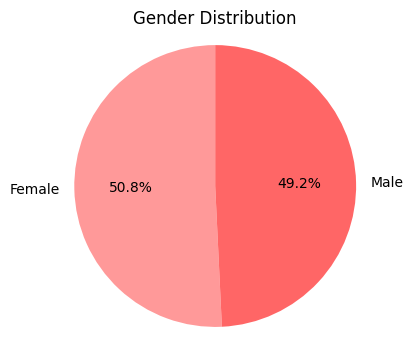

In [9]:
# Gender Distribution - Occurrences of each gender

gender_counts = demo_df['Gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=['Female', 'Male'], colors=['#FF9999', '#FF6666'],
        autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# We see that we have an almost equal distribution of male and female respondents

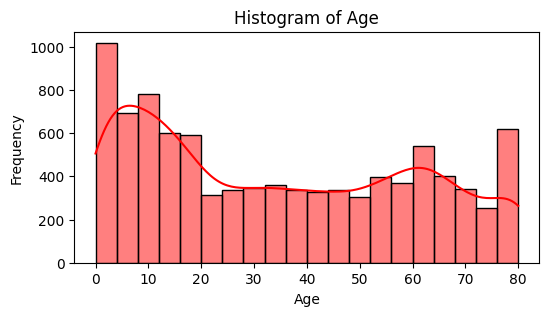

In [10]:
# Age distribution
# Ages 80 and above are marked as 80

plt.figure(figsize=(6, 3))
sns.histplot(data=demo_df, x="Age", bins=20, kde=True, color='red')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# We can infer that majoity are younger respondents.
# But there is still a slight balance between all the ages

In [9]:
ex_df.shape

(8704, 2)

In [10]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  8704 non-null   float64
 1   BMI            8005 non-null   float64
dtypes: float64(2)
memory usage: 136.1 KB


In [11]:
ex_df.describe()

Respondent ID          BMI
count    8704.000000  8005.000000
mean    98315.452091    26.577502
std      2669.112899     8.260724
min     93703.000000    12.300000
25%     96000.750000    20.400000
50%     98308.500000    25.800000
75%    100625.250000    31.300000
max    102956.000000    86.200000

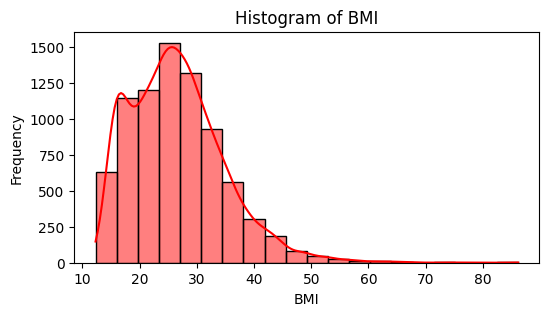

In [14]:
plt.figure(figsize=(6, 3))
sns.histplot(data=ex_df, x="BMI", bins=20, kde=True, color='red')
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# We can infer that majority of the respondents have around a 25 BMI which is just in the healthy range.
# But there are a lot of overweight and underweight people as well.

In [12]:
ex_df.isnull().sum()

# There are 699 null values which we will have to impute.
# These null values shall be imputed later on by replacing them with the mean value

Respondent ID      0
BMI              699
dtype: int64

## Lab and Questionnaire Data Analysis

In [13]:
# Merging all the laboratory data dfs to form a single laboratory dataframe

lab_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), lab_dfs.values())
lab_df.head()

Respondent ID  Chromium [nmol/L]  Cobalt [nmol/L]  Ferritin [ng/mL]  \
0        93705.0               5.58             3.39              28.7   
1        93708.0               5.58             2.72             109.0   
2        93709.0              13.46             5.77             129.0   
3        93711.0               5.58             4.41              40.6   
4        93713.0               5.58             2.04             238.0   

   Iron frozen [umol/L]  UIBC [umol/L]  Total Iron Binding Capacity [umol/L]  \
0                  16.5          41.73                                 58.21   
1                  16.1          34.92                                 51.04   
2                  11.3          42.80                                 54.09   
3                  10.0          51.40                                 61.43   
4                  13.3          35.64                                 48.89   

   Transferrin Saturation [%]  Glycohemoglobin [%]  Triglyceride [mmol/L]  \
0                        28.0                  6.2                    NaN   
1                        32.0                  6.2                  0.655   
2                        21.0                  6.3                    NaN   
3                        16.0                  5.7                  0.542   
4                        27.0                  5.6                    NaN   

   ...  Hematocrit [%]  Mean cell volume [fL]  Mean cell hemoglobin [pg]  \
0  ...            36.7                   67.0                       21.7   
1  ...            39.9                   86.8                       28.8   
2  ...            45.5                   88.8                       30.0   
3  ...            43.2                   92.9                       31.7   
4  ...            42.5                   94.0                       31.5   

   Mean Cell Hgb Conc. [g/dL]  Red cell distribution width [%]  \
0                        32.4                             15.6   
1                        33.1                             13.4   
2                        33.8                             15.7   
3                        34.1                             13.3   
4                        33.5                             15.3   

   Platelet count [1000 cells/uL]  Mean platelet volume [fL]  Nucleated RBCs  \
0                           309.0                        7.9             0.0   
1                           226.0                        9.1             0.2   
2                           228.0                        9.0             0.0   
3                           264.0                        7.7             0.1   
4                           241.0                        9.1             0.0   

   Insulin [pmol/L]  Hepatitis A antibody  
0               NaN                   1.0  
1             58.32                   1.0  
2               NaN                   1.0  
3             31.68                   2.0  
4               NaN                   2.0  

[5 rows x 85 columns]

In [14]:
# Merging all the questionnaire data dfs to form a single laboratory dataframe

q_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), q_dfs.values())
q_df.head()

Respondent ID  Congestive_Heart_Failure  Coronary_Heart_Disease  Stroke  \
0        93703.0                       NaN                     NaN     NaN   
1        93704.0                       NaN                     NaN     NaN   
2        93705.0                       2.0                     2.0     2.0   
3        93706.0                       NaN                     NaN     NaN   
4        93707.0                       NaN                     NaN     NaN   

   Thyroid_Problem  Liver_Condition  Fatty_Liver  Liver_Fibrosis  \
0              NaN              NaN          NaN             NaN   
1              NaN              NaN          NaN             NaN   
2              2.0              2.0          NaN             NaN   
3              NaN              NaN          NaN             NaN   
4              NaN              NaN          NaN             NaN   

   Liver_Cirrhosis  Viral_Hepatitis  ...  Cancer  Cancer_Type  Anemia  \
0              NaN              NaN  ...     NaN          NaN     2.0   
1              NaN              NaN  ...     NaN          NaN     2.0   
2              NaN              NaN  ...     2.0          NaN     2.0   
3              NaN              NaN  ...     NaN          NaN     2.0   
4              NaN              NaN  ...     NaN          NaN     2.0   

   Heart_Attack  Hepatitis C  Pregnancy  No. of pregnancies  \
0           NaN          NaN        NaN                 NaN   
1           NaN          NaN        NaN                 NaN   
2           2.0          2.0        NaN                 2.0   
3           NaN          2.0        NaN                 NaN   
4           NaN          2.0        NaN                 NaN   

   Gestational diabetes  Diabetes  Weak/Failing kidneys  
0                   NaN       2.0                   NaN  
1                   NaN       2.0                   NaN  
2                   2.0       2.0                   2.0  
3                   NaN       2.0                   NaN  
4                   NaN       2.0                   NaN  

[5 rows x 22 columns]

In [15]:
# We have Hepatitis A and B in lab dataset and pregnancy data in questionnaire dataset. 
# We could swap them so that all the diseases are in the questionnaire data and other features are in the lab data.

q_df = q_df.merge(lab_df[["Respondent ID","Hepatitis A antibody","Hepatitis B core antibody"]], 
                  on='Respondent ID', how="outer")
lab_df.drop(["Hepatitis A antibody","Hepatitis B core antibody"], axis=1, inplace=True)

lab_df = lab_df.merge(q_df[["Respondent ID","Pregnancy","No. of pregnancies"]], 
                  on='Respondent ID', how="outer")
q_df.drop(["Pregnancy","No. of pregnancies"], axis=1, inplace=True)

In [16]:
lab_df.shape

(8897, 85)

In [17]:
lab_df.dtypes

# All the variable are in float datatype

Respondent ID                float64
Chromium [nmol/L]            float64
Cobalt [nmol/L]              float64
Ferritin [ng/mL]             float64
Iron frozen [umol/L]         float64
                              ...   
Mean platelet volume [fL]    float64
Nucleated RBCs               float64
Insulin [pmol/L]             float64
Pregnancy                    float64
No. of pregnancies           float64
Length: 85, dtype: object

In [18]:
lab_df.describe()

Respondent ID  Chromium [nmol/L]  Cobalt [nmol/L]  Ferritin [ng/mL]  \
count    8897.000000        3518.000000      3520.000000       6589.000000   
mean    98333.855794           6.787297         3.653375        133.394928   
std      2671.896914           6.101881         8.203446        180.307803   
min     93703.000000           5.580000         0.680000          1.040000   
25%     96017.000000           5.580000         2.210000         36.600000   
50%     98348.000000           5.580000         2.720000         80.700000   
75%    100645.000000           5.580000         3.390000        165.000000   
max    102956.000000         165.760000       301.900000       5190.000000   

       Iron frozen [umol/L]  UIBC [umol/L]  \
count           5922.000000    5899.000000   
mean              15.448058      43.344840   
std                6.577564      11.901876   
min                2.000000       0.180000   
25%               10.900000      35.640000   
50%               14.700000      42.270000   
75%               19.000000      49.790000   
max               86.100000     107.820000   

       Total Iron Binding Capacity [umol/L]  Transferrin Saturation [%]  \
count                           5893.000000                 5893.000000   
mean                              58.796572                   26.937214   
std                                9.549179                   11.803701   
min                               24.890000                    2.000000   
25%                               52.300000                   19.000000   
50%                               58.030000                   26.000000   
75%                               64.120000                   33.000000   
max                              111.220000                   92.000000   

       Glycohemoglobin [%]  Triglyceride [mmol/L]  ...  Mean cell volume [fL]  \
count          6045.000000            2659.000000  ...            7528.000000   
mean              5.769562               1.219948  ...              86.563470   
std               1.037838               1.130973  ...               6.594074   
min               3.800000               0.113000  ...              35.400000   
25%               5.200000               0.655000  ...              82.900000   
50%               5.500000               0.982000  ...              87.100000   
75%               5.900000               1.468000  ...              90.900000   
max              16.200000              30.302000  ...             114.600000   

       Mean cell hemoglobin [pg]  Mean Cell Hgb Conc. [g/dL]  \
count                7528.000000                 7528.000000   
mean                   29.074110                   33.569075   
std                     2.538204                    0.932988   
min                    12.400000                   25.200000   
25%                    27.775000                   33.000000   
50%                    29.300000                   33.600000   
75%                    30.700000                   34.200000   
max                    39.200000                   38.300000   

       Red cell distribution width [%]  Platelet count [1000 cells/uL]  \
count                      7528.000000                     7528.000000   
mean                         13.775319                      259.250133   
std                           1.271054                       70.689106   
min                          11.300000                        8.000000   
25%                          13.000000                      211.000000   
50%                          13.500000                      251.000000   
75%                          14.200000                      300.000000   
max                          29.200000                      818.000000   

       Mean platelet volume [fL]  Nucleated RBCs  Insulin [pmol/L]  \
count                7528.000000     7523.000000       2650.000000   
mean                    8.093876        0.085099         85.453019   
std                     0.911

In [19]:
# We can describe any specific column in the dataset

lab_df['Triglyceride [mmol/L]'].describe()

count    2659.000000
mean        1.219948
std         1.130973
min         0.113000
25%         0.655000
50%         0.982000
75%         1.468000
max        30.302000
Name: Triglyceride [mmol/L], dtype: float64

In [20]:
q_df.shape

(8897, 22)

In [21]:
q_df.dtypes

Respondent ID                float64
Congestive_Heart_Failure     float64
Coronary_Heart_Disease       float64
Stroke                       float64
Thyroid_Problem              float64
Liver_Condition              float64
Fatty_Liver                  float64
Liver_Fibrosis               float64
Liver_Cirrhosis              float64
Viral_Hepatitis              float64
Autoimmune_Hepatitis         float64
Jaundice                     float64
Cancer                       float64
Cancer_Type                  float64
Anemia                       float64
Heart_Attack                 float64
Hepatitis C                  float64
Gestational diabetes         float64
Diabetes                     float64
Weak/Failing kidneys         float64
Hepatitis A antibody         float64
Hepatitis B core antibody    float64
dtype: object

In [22]:
q_df.describe()

Respondent ID  Congestive_Heart_Failure  Coronary_Heart_Disease  \
count    8897.000000               5569.000000             5569.000000   
mean    98333.855794                  1.985276                1.972526   
std      2671.896914                  0.430682                0.433178   
min     93703.000000                  1.000000                1.000000   
25%     96017.000000                  2.000000                2.000000   
50%     98348.000000                  2.000000                2.000000   
75%    100645.000000                  2.000000                2.000000   
max    102956.000000                  9.000000                9.000000   

            Stroke  Thyroid_Problem  Liver_Condition  Fatty_Liver  \
count  5569.000000      5569.000000      5569.000000   141.000000   
mean      1.963548         1.900521         1.966062    16.290780   
std       0.368380         0.480752         0.428549    35.689242   
min       1.000000         1.000000         1.000000     1.000000   
25%       2.000000         2.000000         2.000000     1.000000   
50%       2.000000         2.000000         2.000000     1.000000   
75%       2.000000         2.000000         2.000000     1.000000   
max       9.000000         9.000000         9.000000    99.000000   

       Liver_Fibrosis  Liver_Cirrhosis  Viral_Hepatitis  ...       Cancer  \
count             6.0             24.0             50.0  ...  5569.000000   
mean              2.0              3.0              4.0  ...     1.896929   
std               0.0              0.0              0.0  ...     0.335527   
min               2.0              3.0              4.0  ...     1.000000   
25%               2.0              3.0              4.0  ...     2.000000   
50%               2.0              3.0              4.0  ...     2.000000   
75%               2.0              3.0              4.0  ...     2.000000   
max               2.0              3.0              4.0  ...     9.000000   

       Cancer_Type       Anemia  Heart_Attack  Hepatitis C  \
count   588.000000  8897.000000   5569.000000  7878.000000   
mean     26.855442     1.973474      1.964087     2.014090   
std      13.862473     0.342530      0.367701     0.446082   
min      10.000000     1.000000      1.000000     1.000000   
25%      16.000000     2.000000      2.000000     2.000000   
50%      28.000000     2.000000      2.000000     2.000000   
75%      32.000000     2.000000      2.000000     2.000000   
max      99.000000     9.000000      9.000000     9.000000   

       Gestational diabetes     Diabetes  Weak/Failing kidneys  \
count           2113.000000  8897.000000           5569.000000   
mean               1.927118     1.923457              1.971270   
std                0.344585     0.370457              0.344133   
min                1.000000     1.000000              1.000000   
25%                2.000000     2.000000              2.000000   
50%                2.000000     2.000000              2.000000   
75%                2.000000     2.000000              2.000000   
max                9.000000     9.000000              9.000000   

       Hepatitis A antibody  Hepatitis B core antibody  
count           7137.000000                6794.000000  
mean               1.380272                   1.940241  
std                0.485776                   0.237677  
min                1.000000                   1.000000  
25%                1.000000                   2.000000  
50%                1.000000                   2.000000  
75%                2.000000                   2.000000  
max                3.000000                   3.000000  

[8 rows x 22 columns]

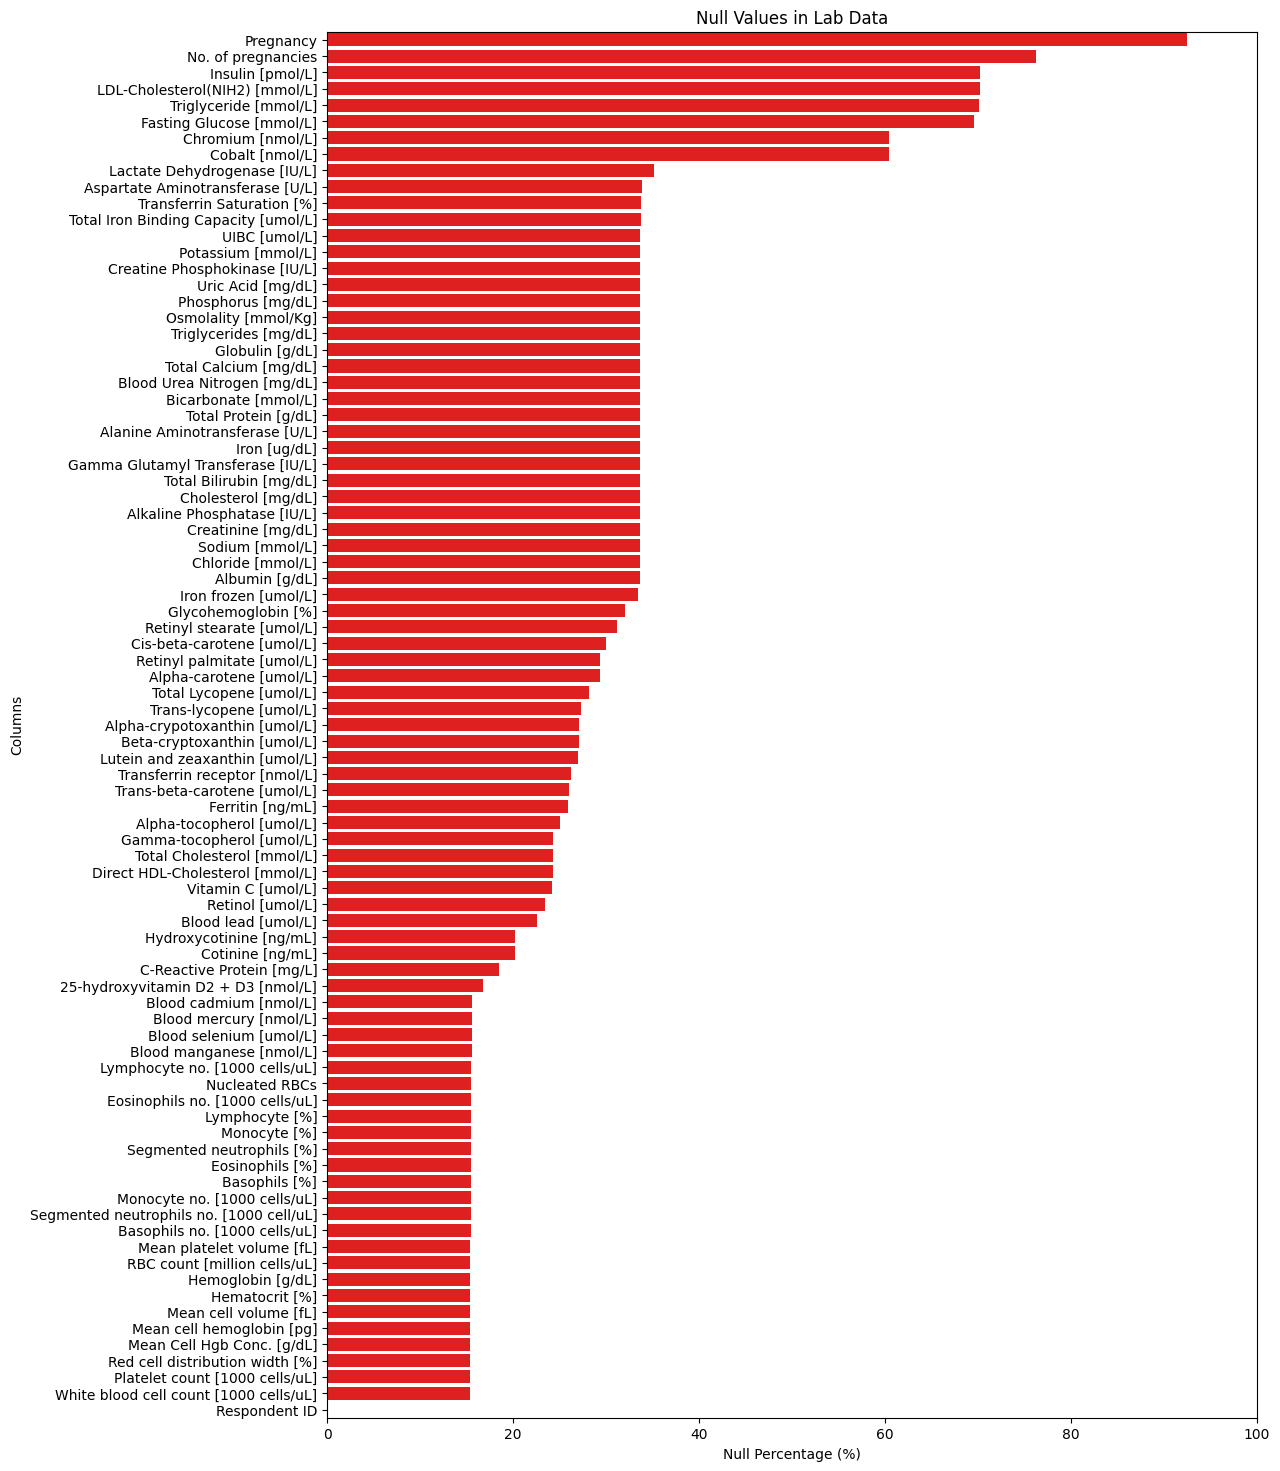

In [36]:
# Percentage of null values in each column of lab data
null_percentage = (lab_df.isnull().sum() / len(lab_df)) * 100

# DataFrame with column names and null percentages
null_data = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})

# DataFrame by null percentage in descending order
null_data = null_data.sort_values(by='Null Percentage', ascending=False)

# Plotting the null value percentage for each column
plt.figure(figsize=(12,18))
sns.barplot(x='Null Percentage', y='Column', data=null_data, color='red')

plt.xlabel('Null Percentage (%)')
plt.ylabel('Columns')
plt.title('Null Values in Lab Data')
plt.xlim(0, 100)
plt.show()

# Here we can observe some columns have a lot of null values
# We will have to either impute the missing values or remove them (or sample them) before training

## Univariate Analysis

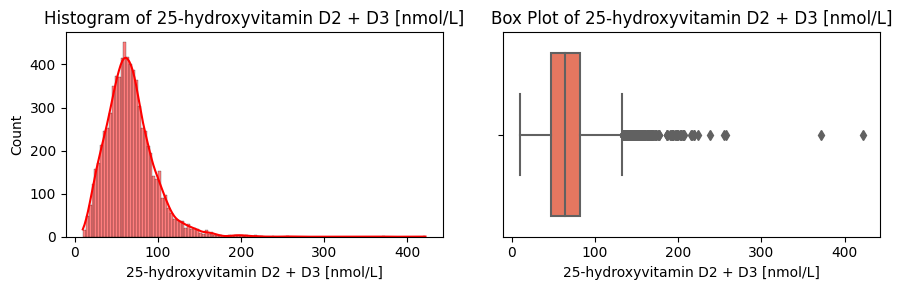

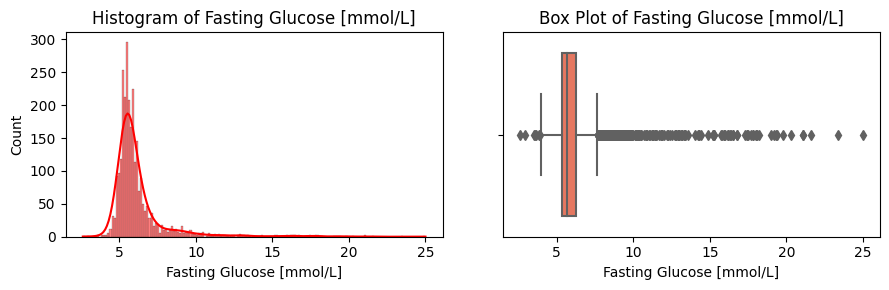

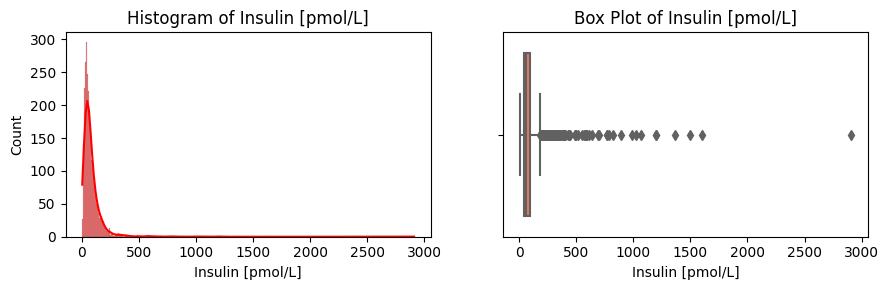

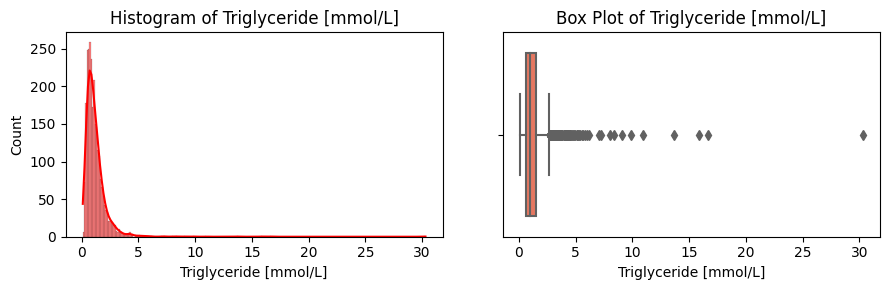

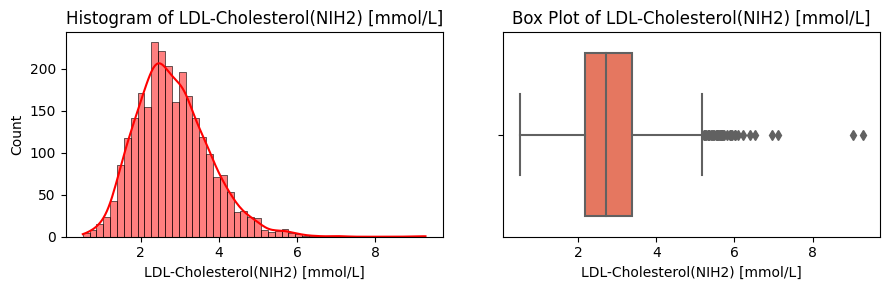

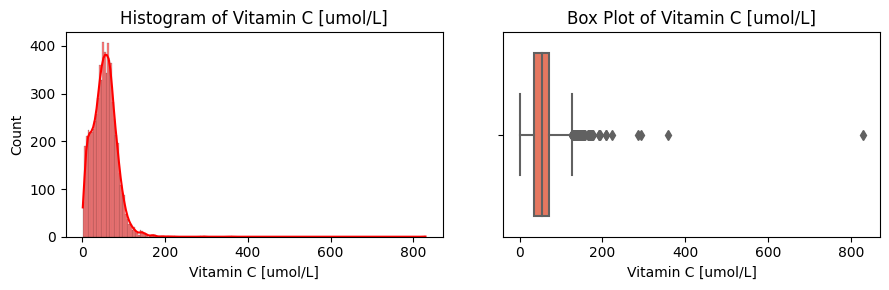

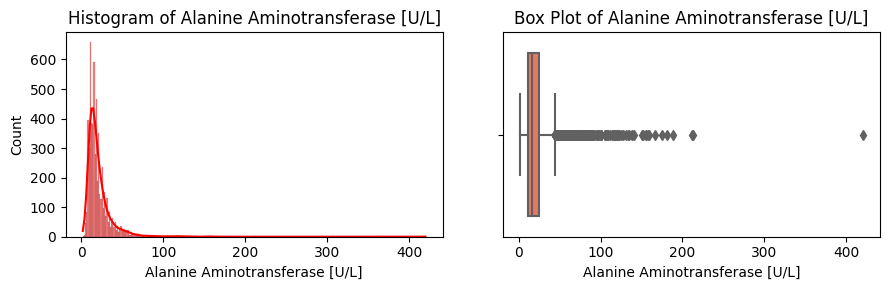

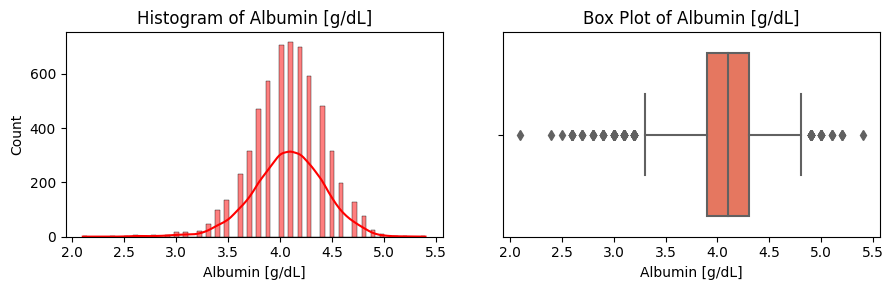

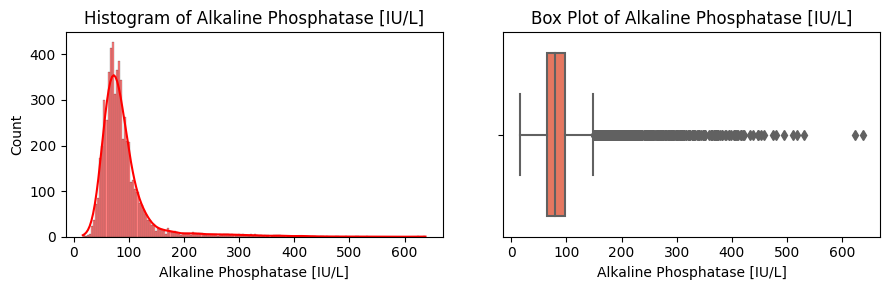

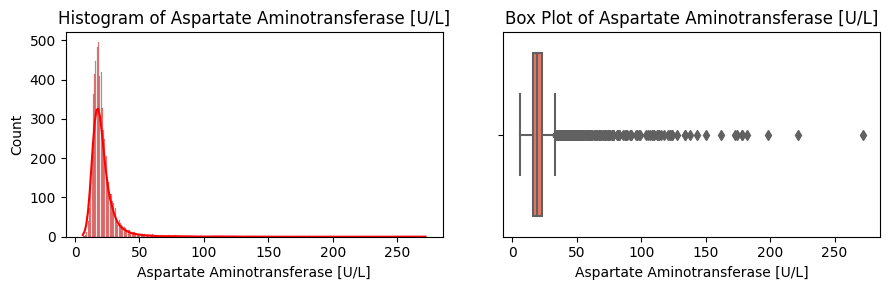

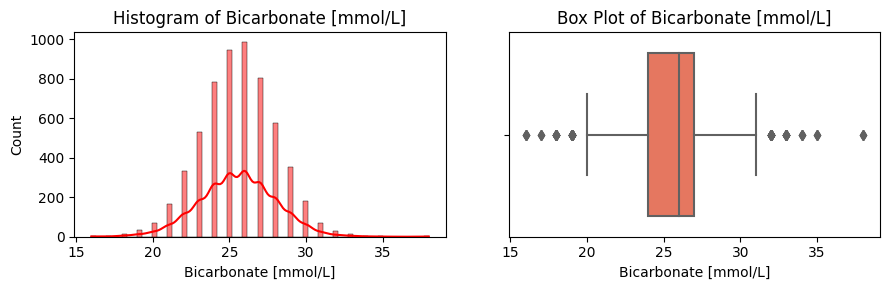

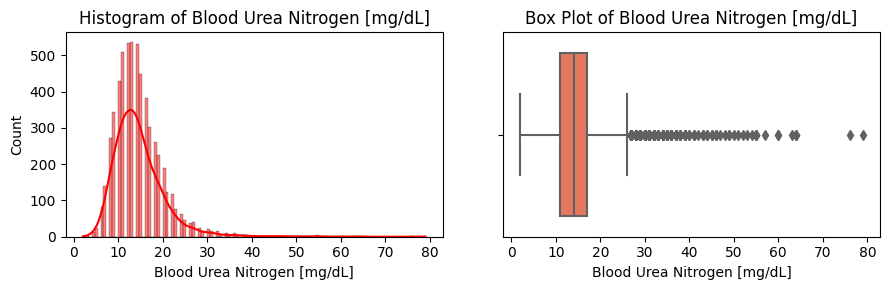

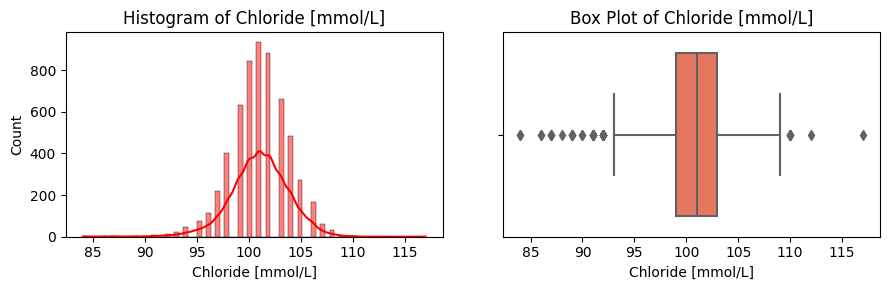

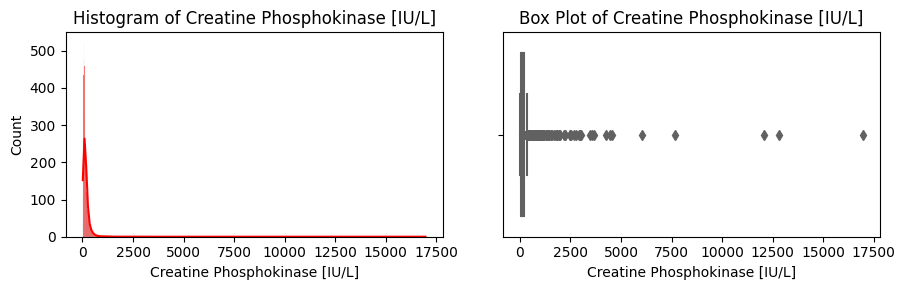

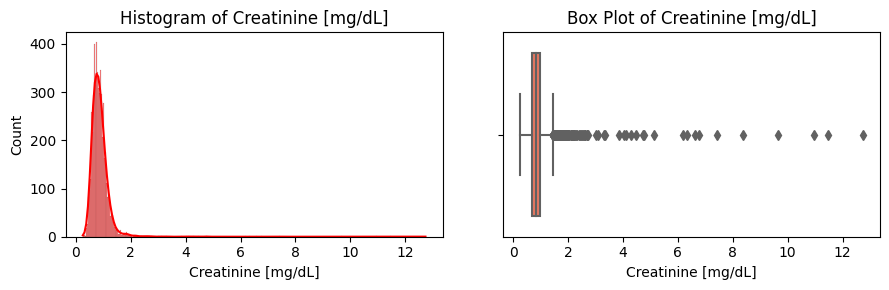

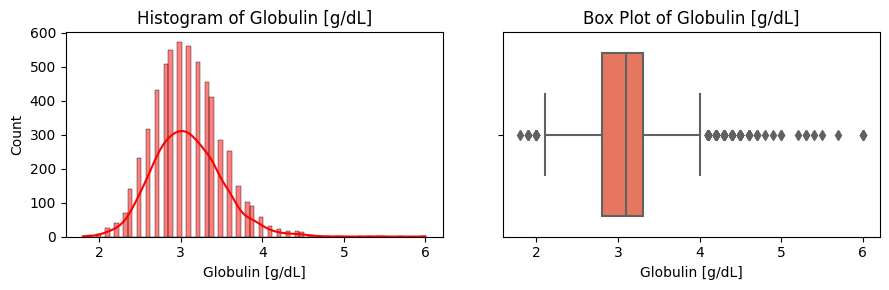

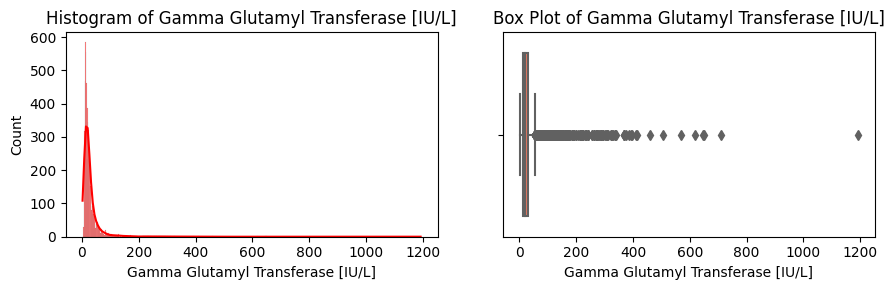

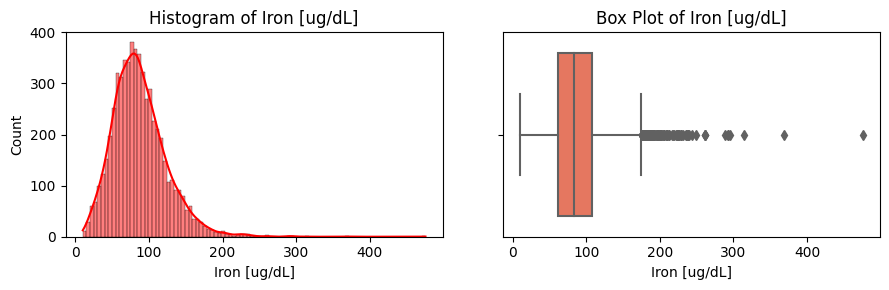

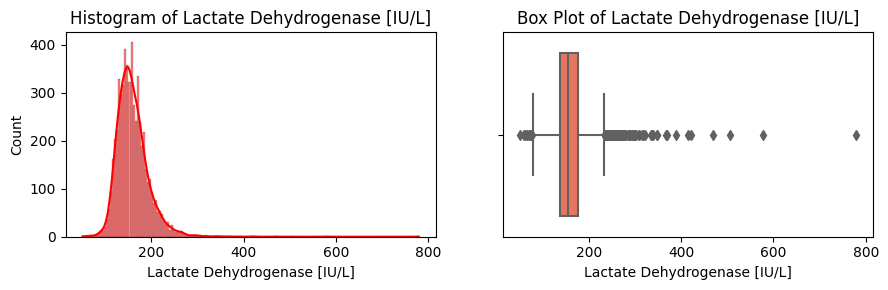

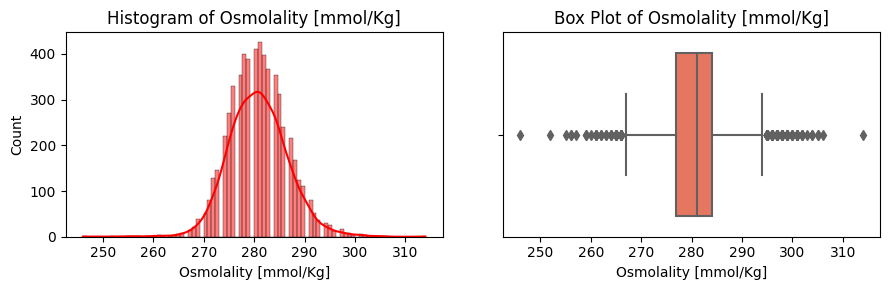

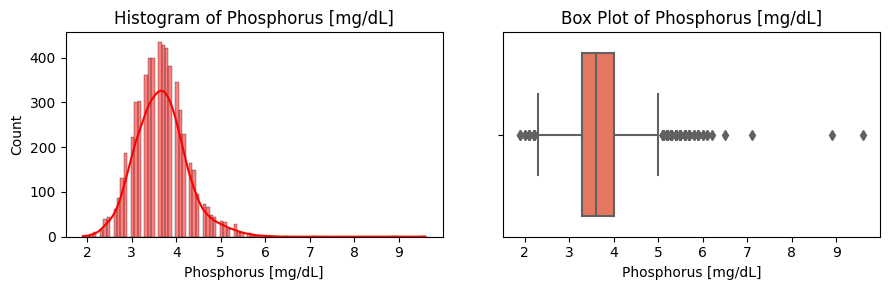

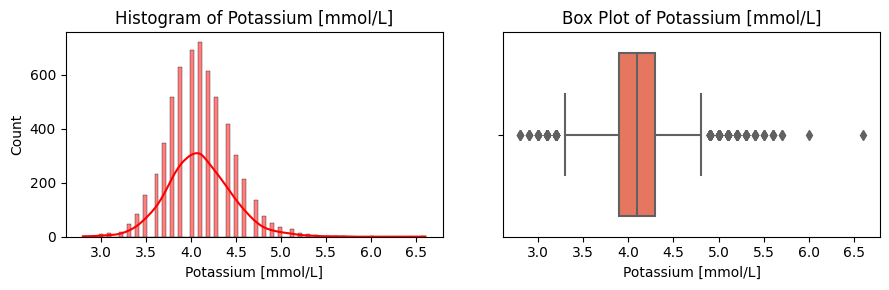

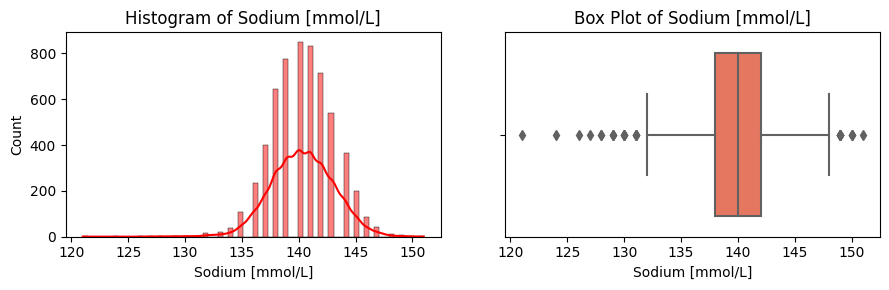

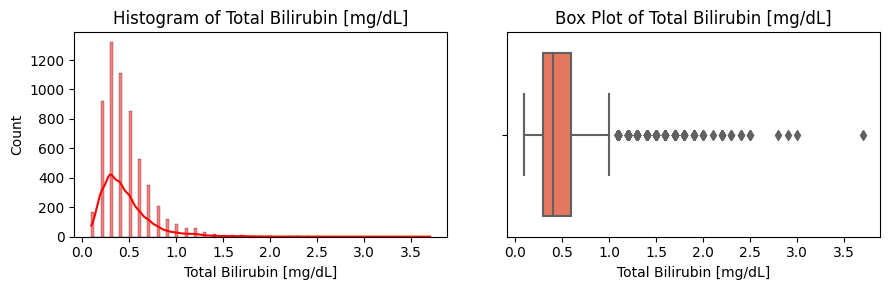

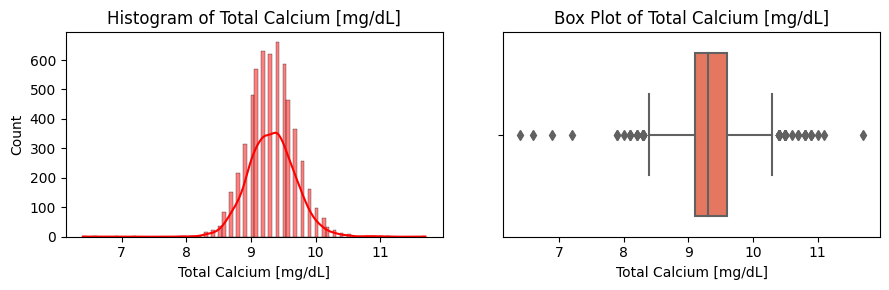

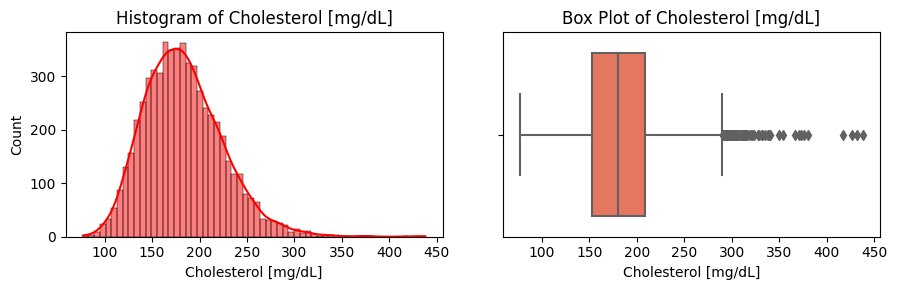

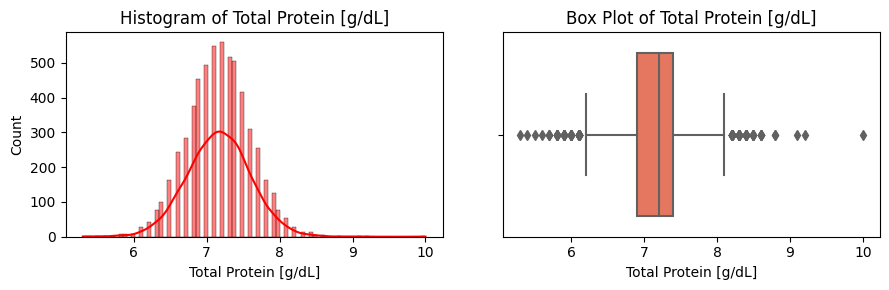

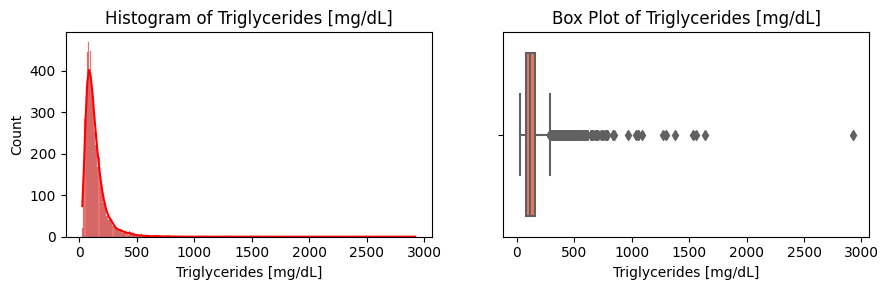

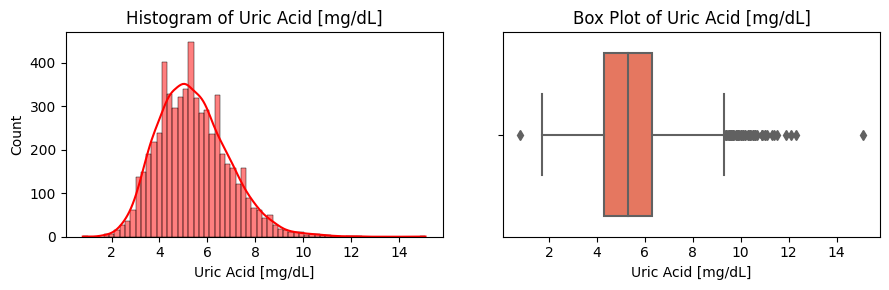

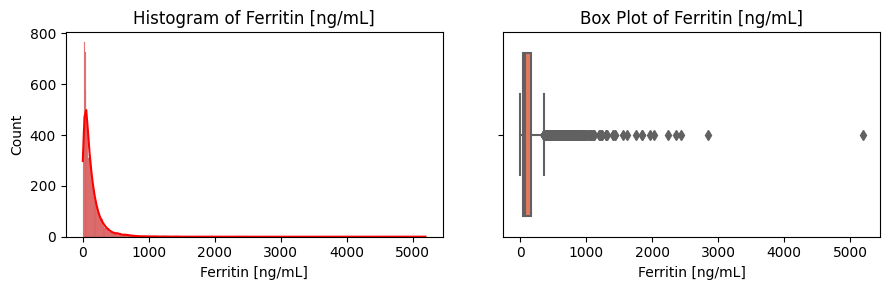

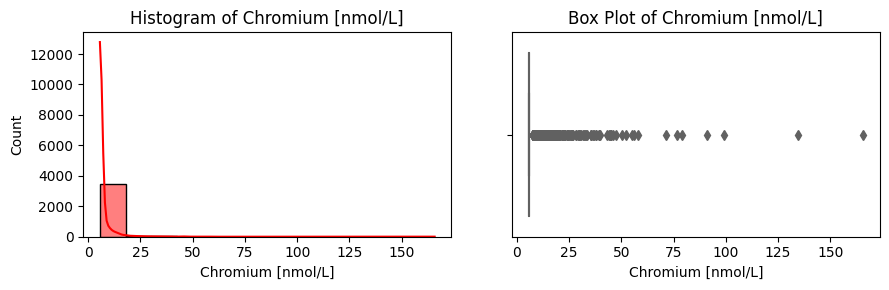

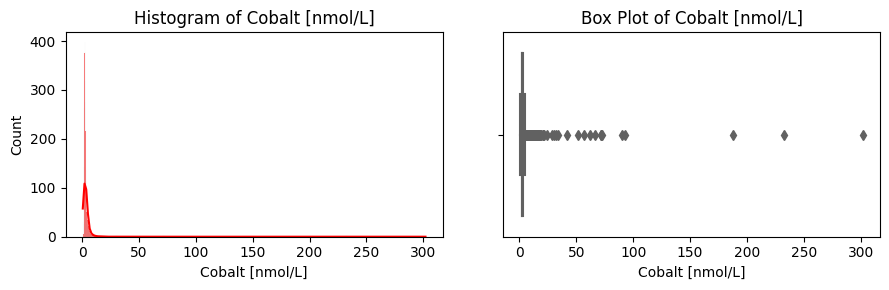

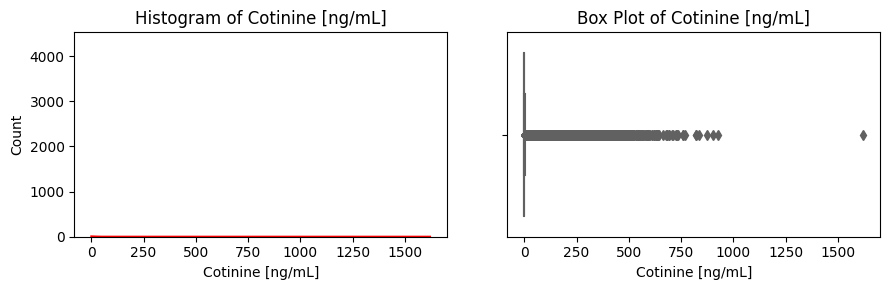

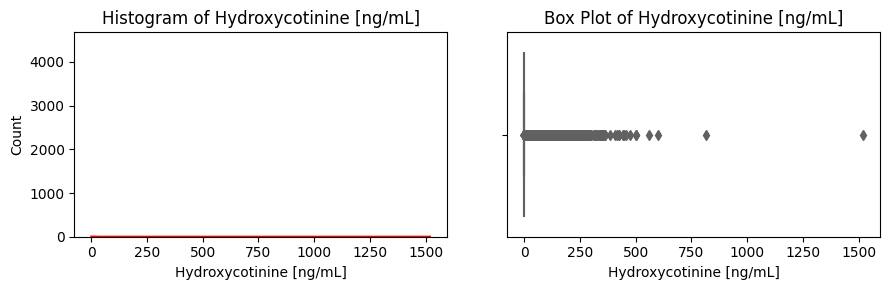

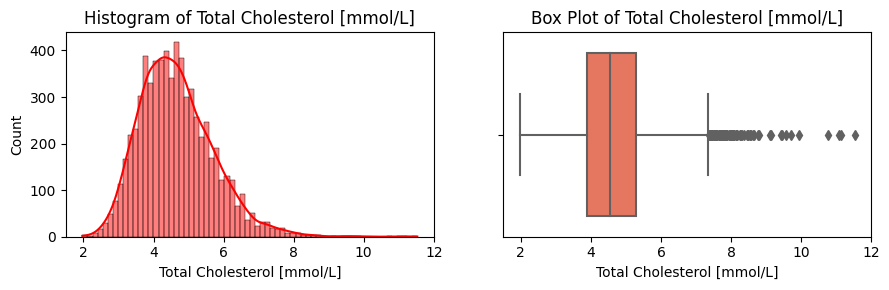

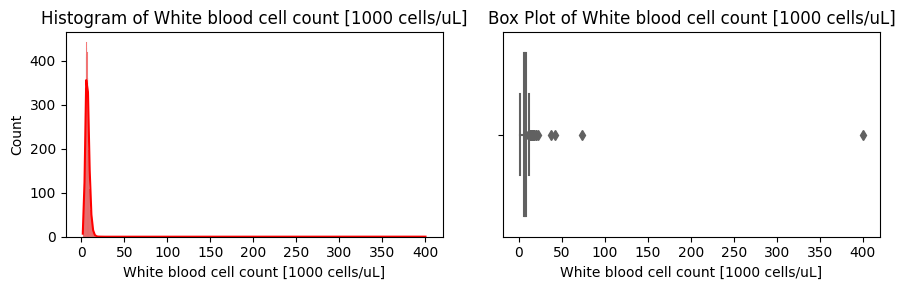

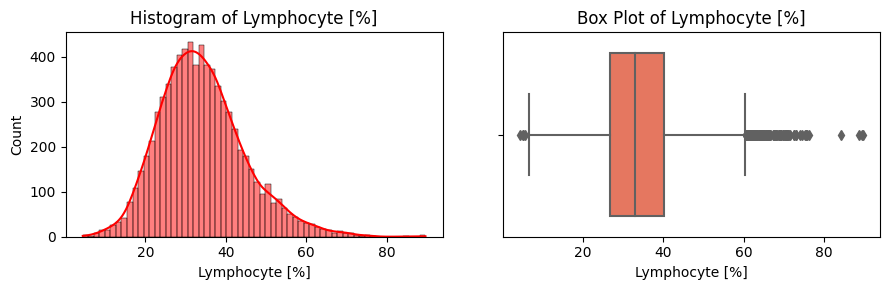

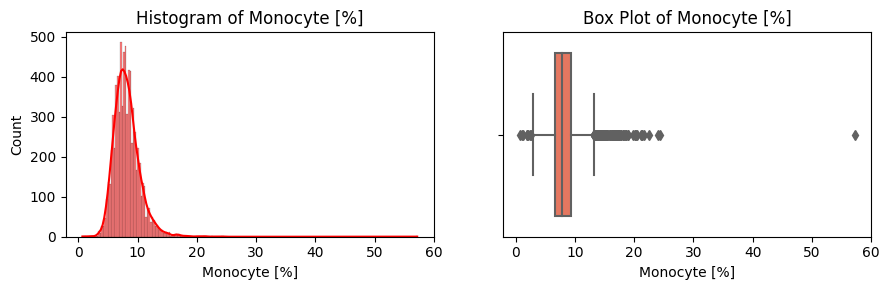

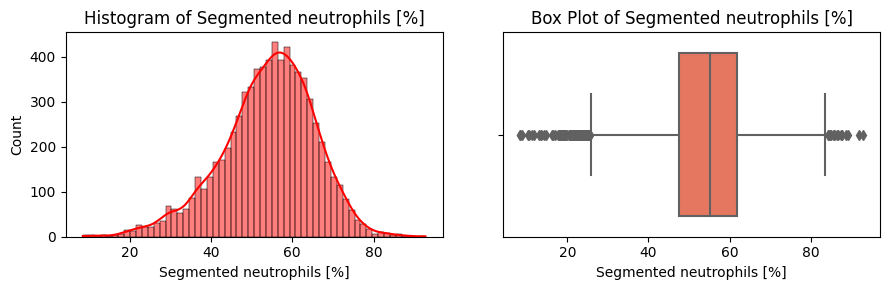

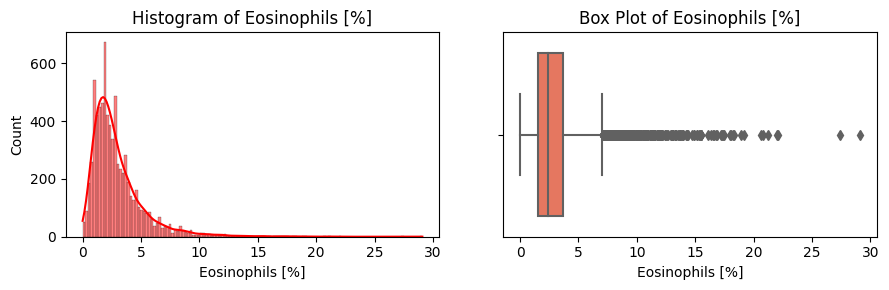

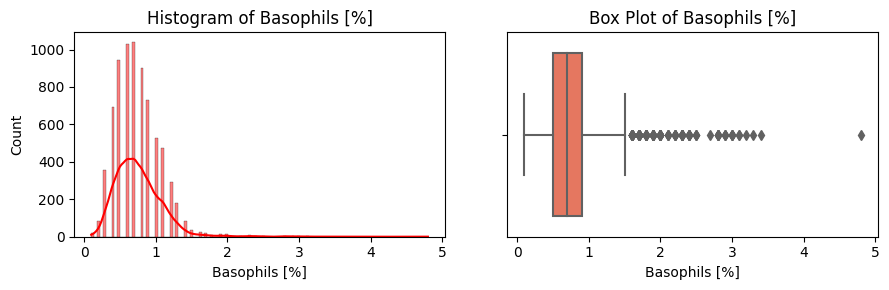

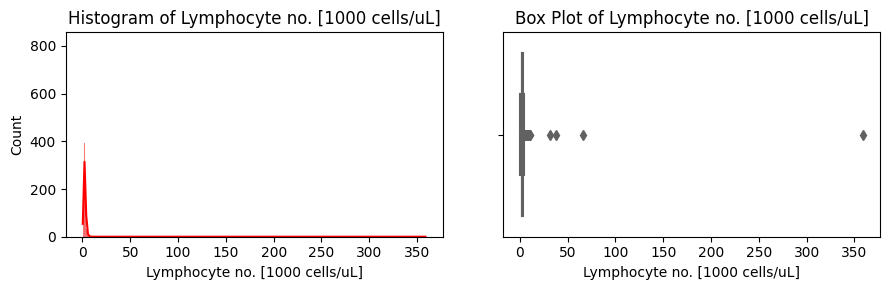

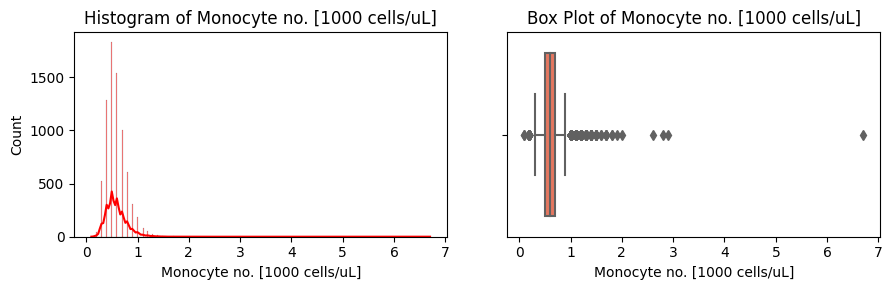

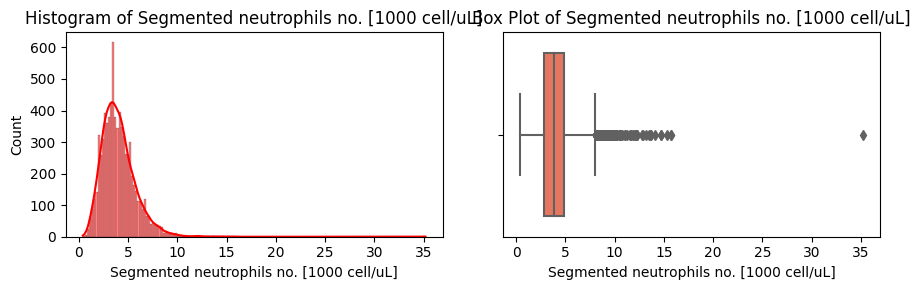

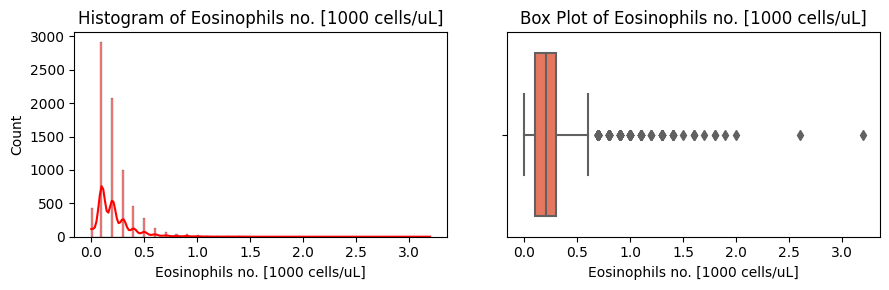

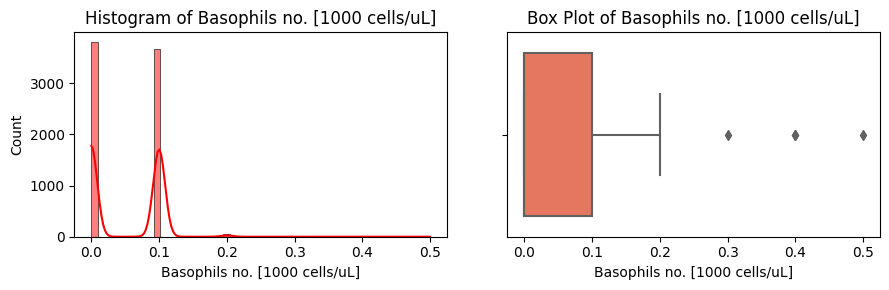

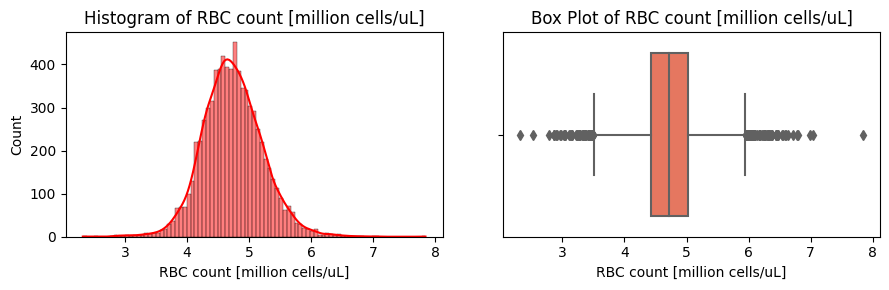

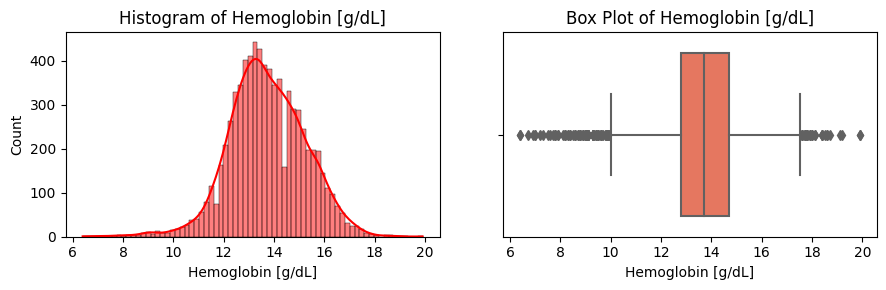

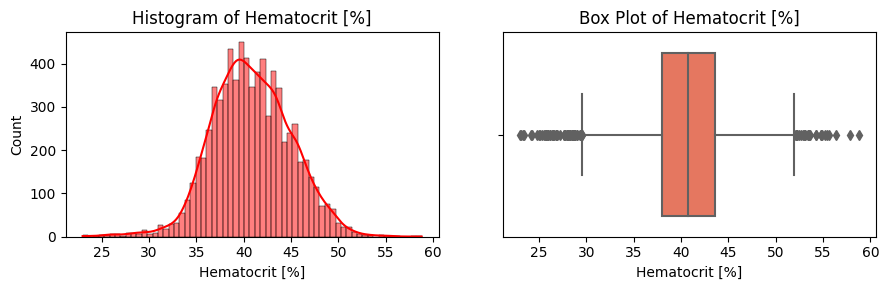

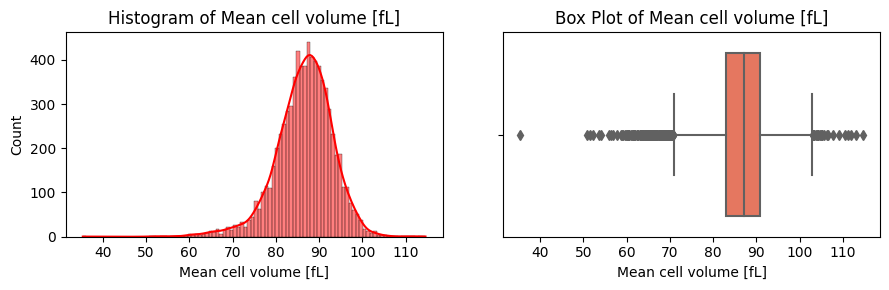

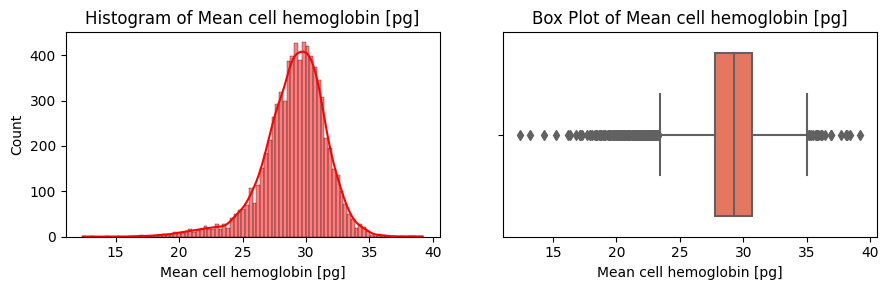

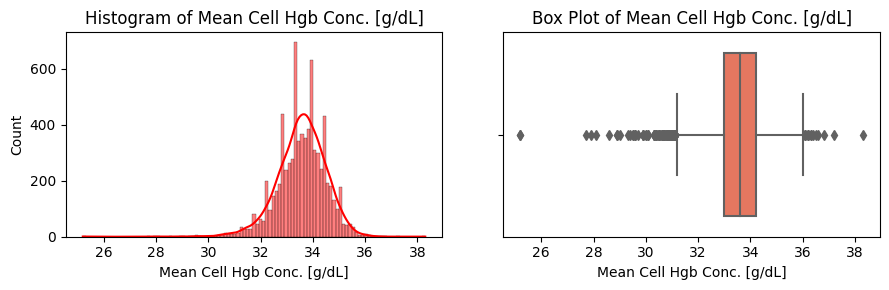

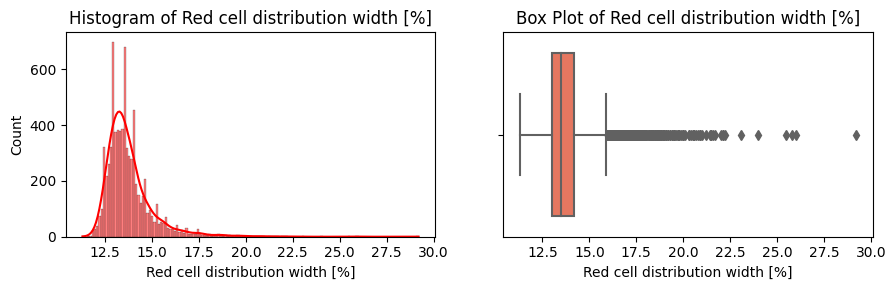

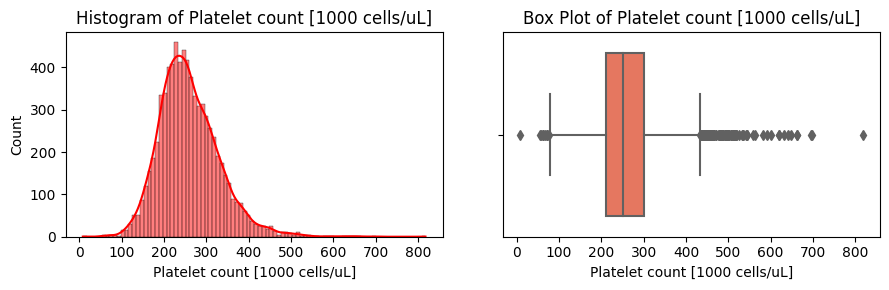

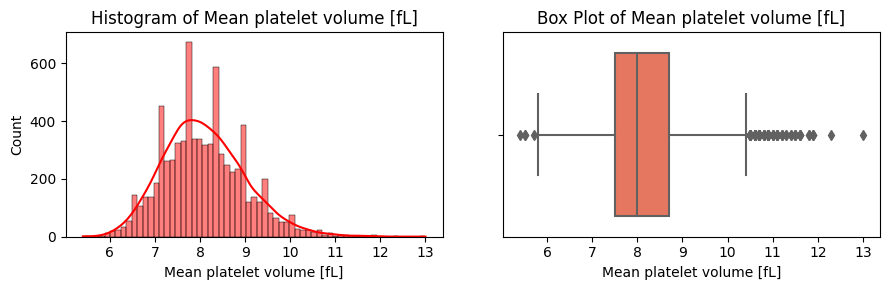

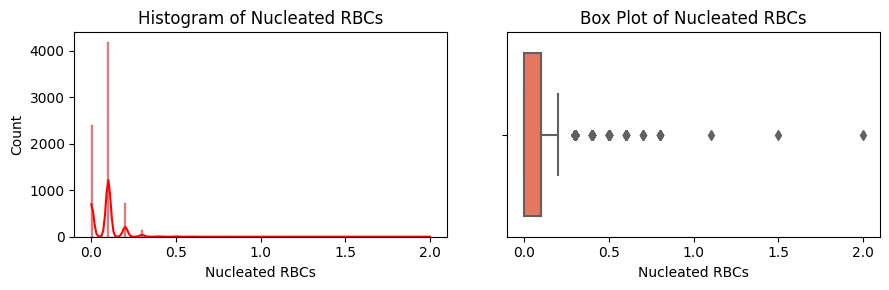

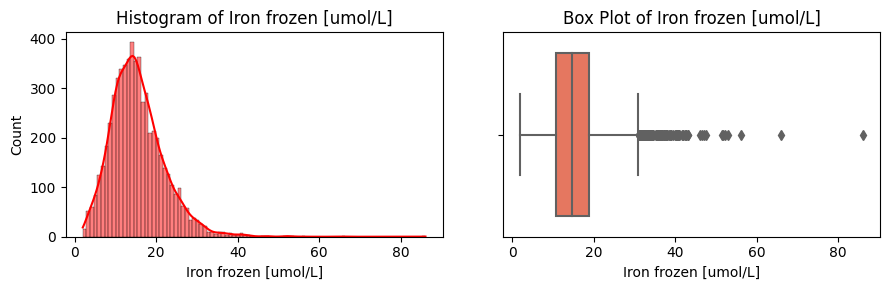

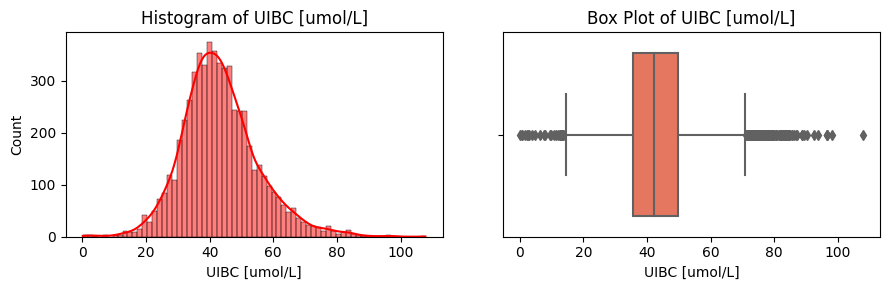

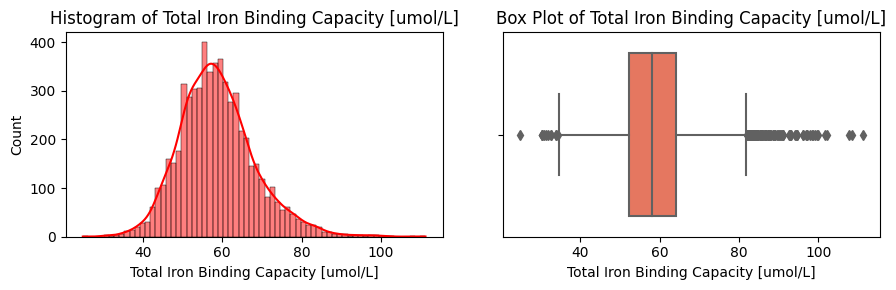

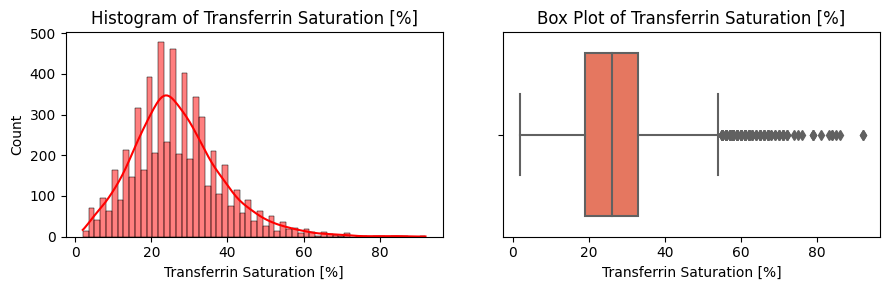

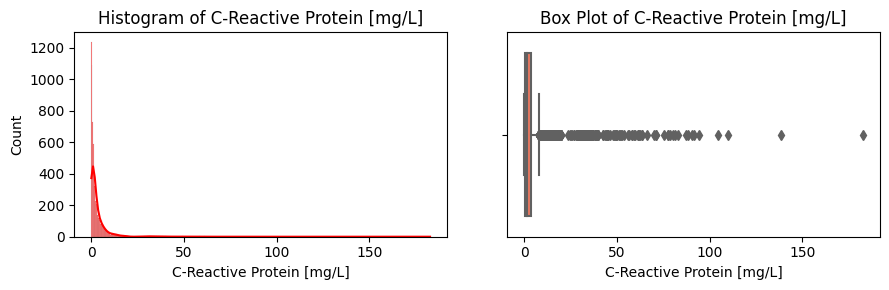

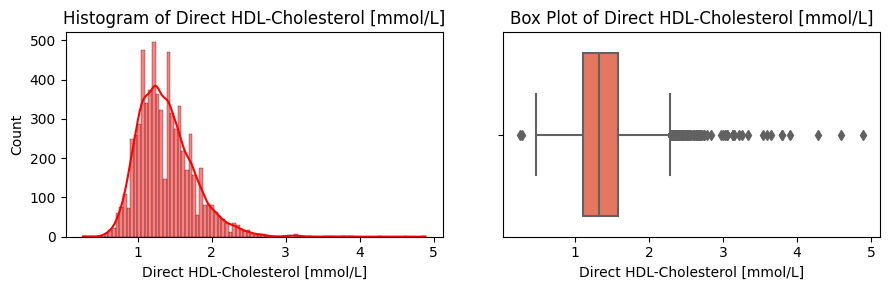

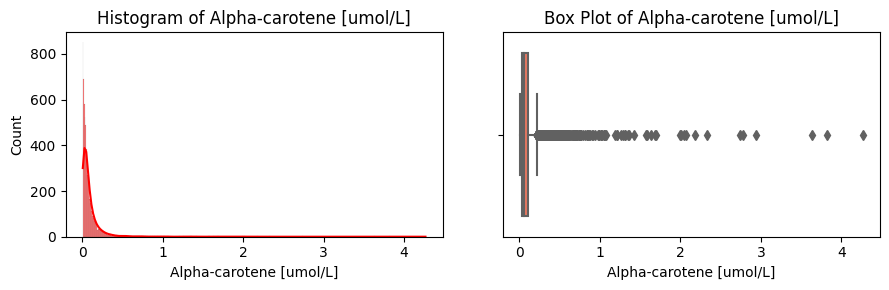

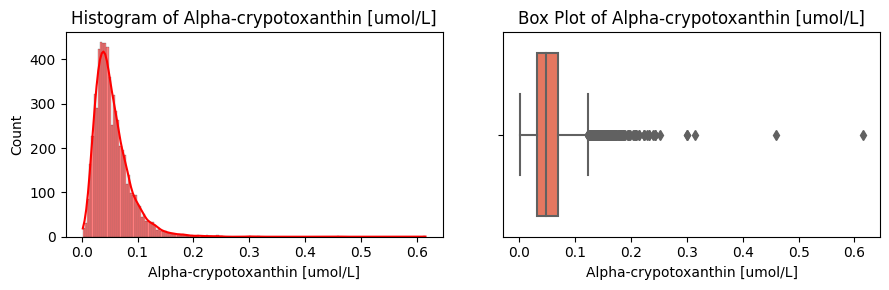

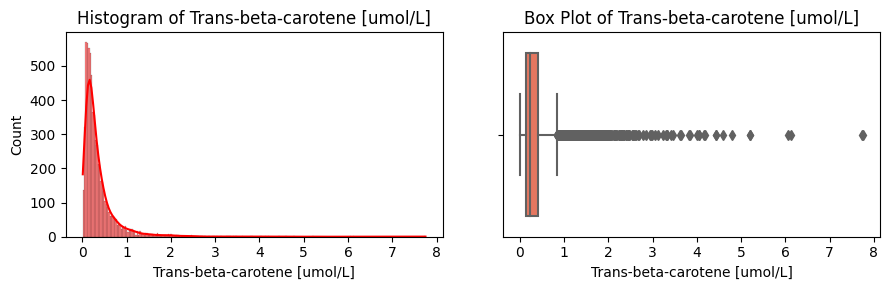

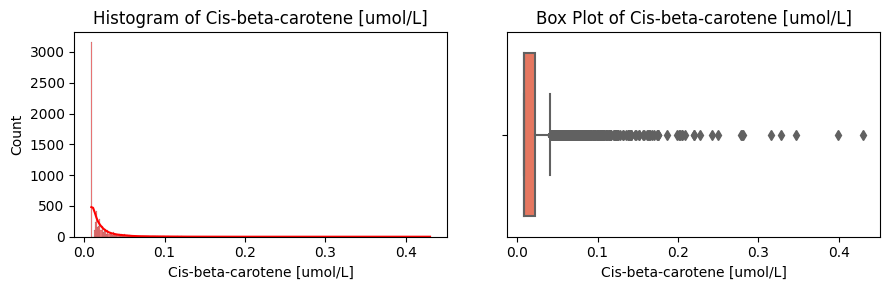

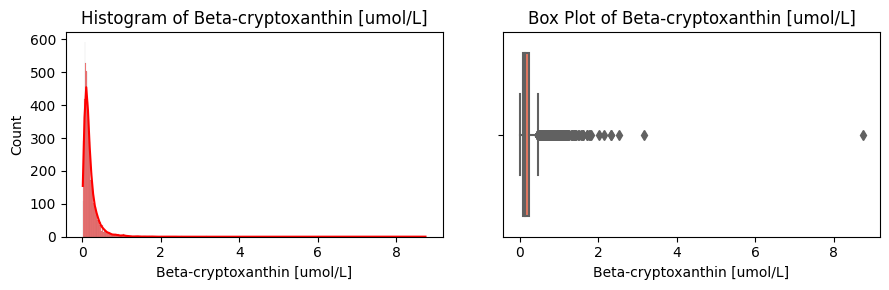

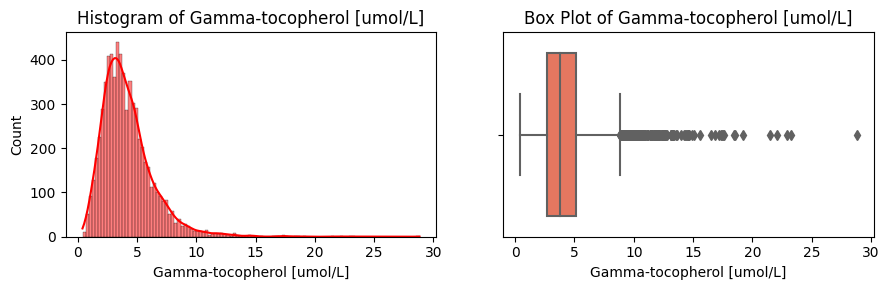

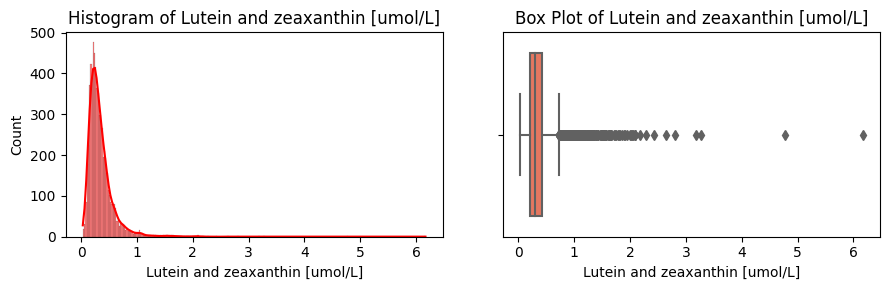

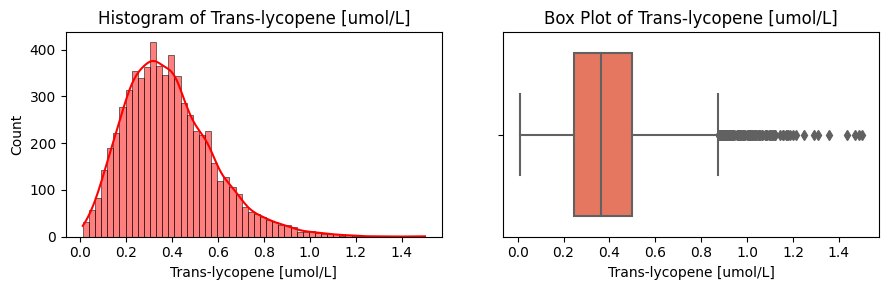

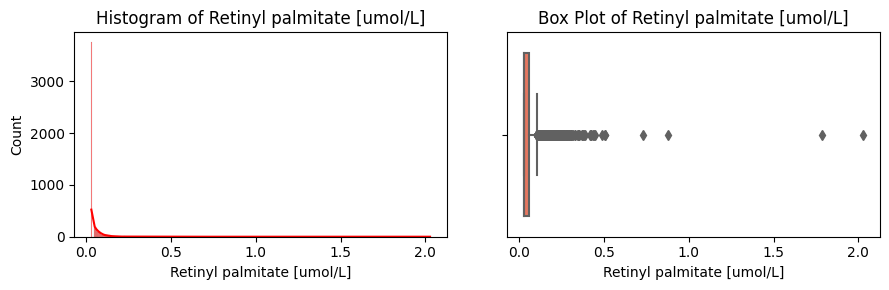

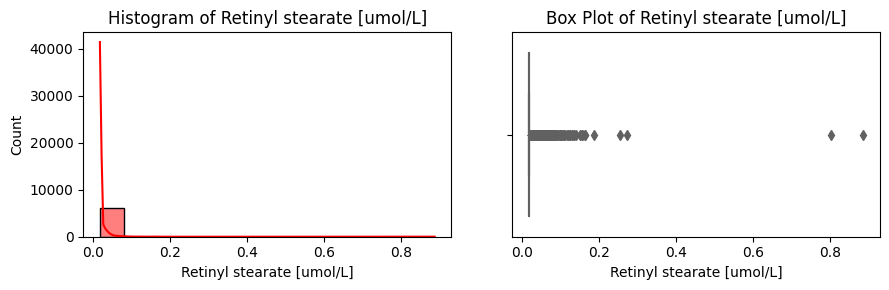

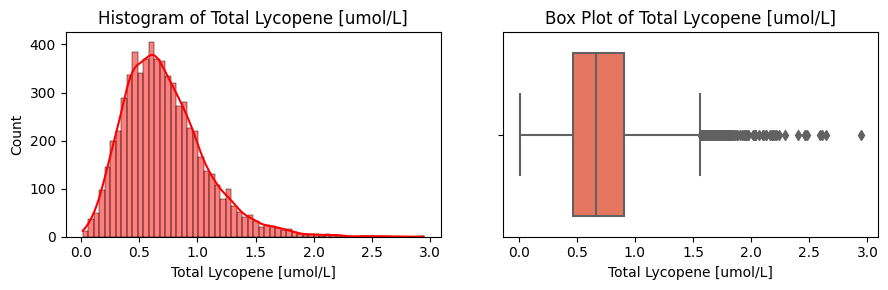

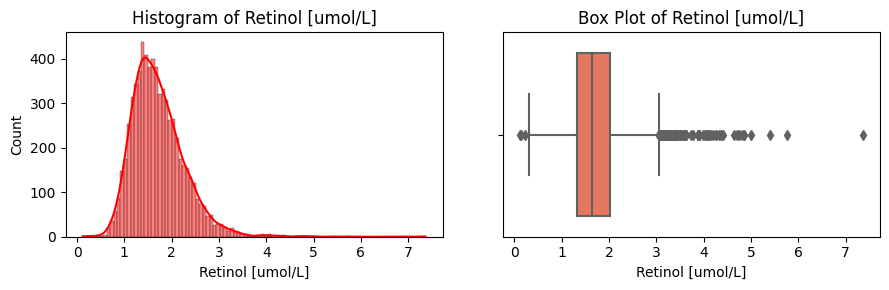

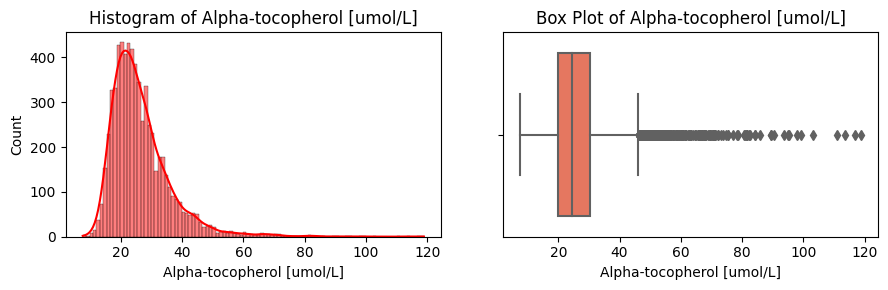

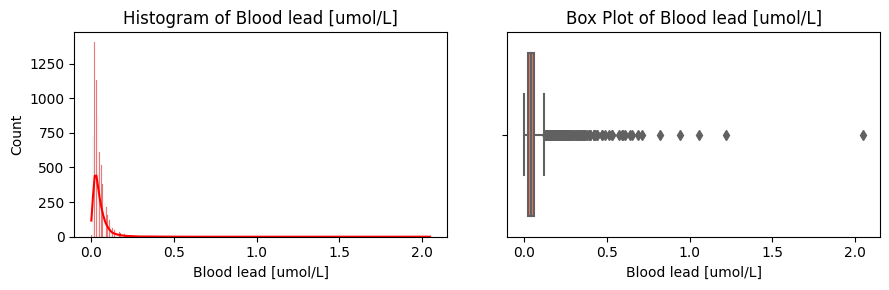

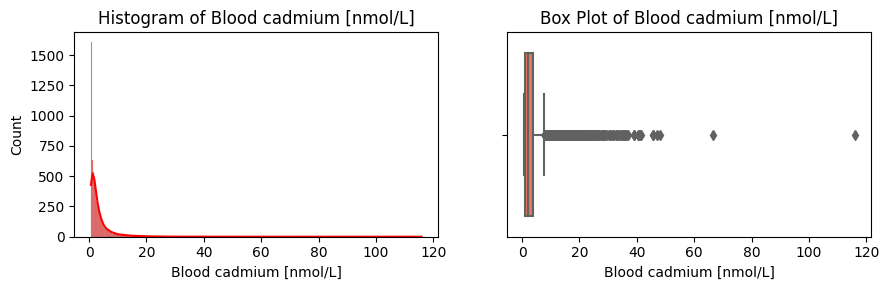

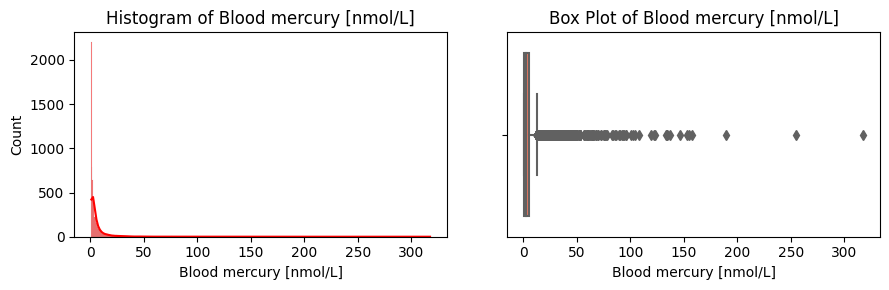

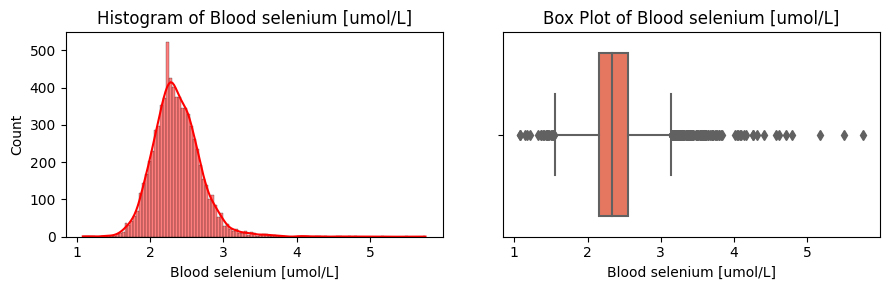

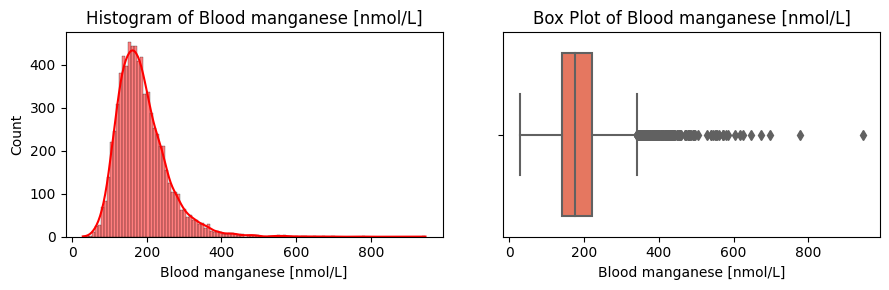

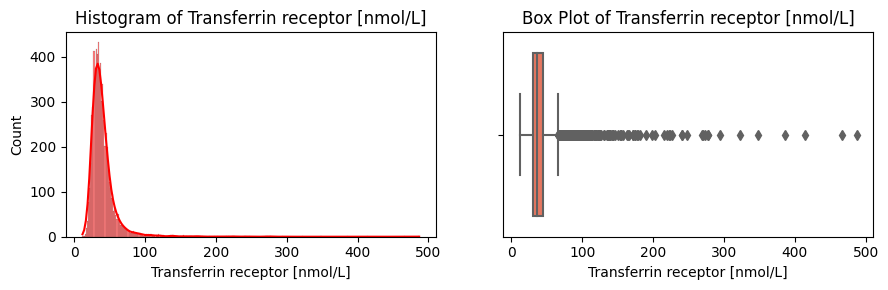

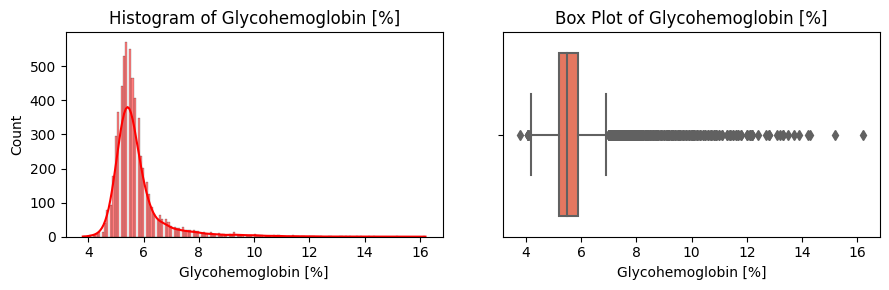

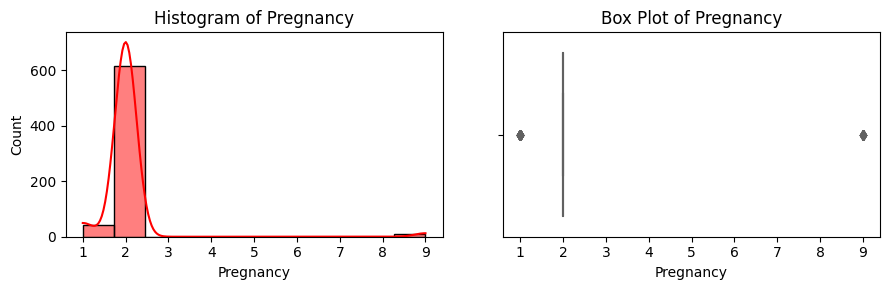

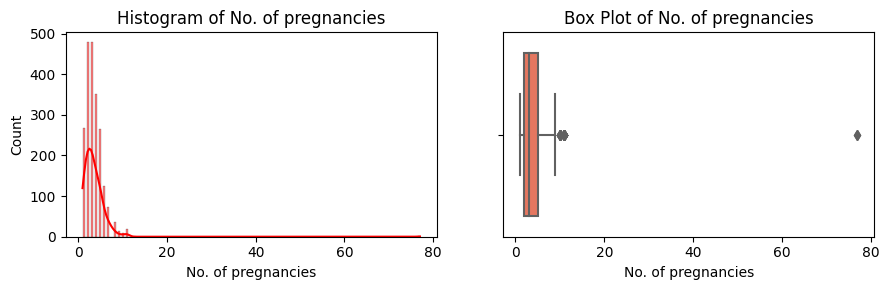

In [43]:
# Univariate Analysis of Lab Variables

for column in lab_df.drop('Respondent ID', axis=1):
    plt.figure(figsize=(9,3))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=lab_df, x=column, kde=True, color='red')
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=lab_df, x=column, palette='Reds')
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout(w_pad = 4)
    plt.show()

# We can see that some of these variables are left skewed meaning they tend to be concentrated with lower values
# There are also right skewed ones like sodium
# There are some with normal distributions
# Some variables have very low values and some have a high frequency for a single value
# We can also detect some outliers here

In [23]:
# We can see a lot of outliers in the boxplots
# However most of these outlier values are still important
# This can be seen, for example, in the pregnancy data where 1 and 9 values are detected as outliers
# But here 1 stands for pregnant and 9 stands for don't know.
# As there are a lot of 2 (not pregnant) values, 1 and 9 are detected as outliers
# But clearly 1 is important in this case
# Hence we shall detect outliers using Z Score using a threshold of 3

from scipy.stats import zscore

zscore_threshold = 3

# Calculate z-score and outliers for each column 
for column in lab_df.columns:
    z_scores = zscore(lab_df[column])
    outliers = sum(z_scores > zscore_threshold) + sum(z_scores < -zscore_threshold)
if outliers > 0:
    print(outliers)
else:
    print('No extreme outliers')

No extreme outliers


In [24]:
# Percentage of null values in the questionnaire data (diseases)

q_df.isnull().sum()/len(q_df)*100

# We see a lot of null values, some even have over 95%
# These will either have to be sampled or eliminated or it can be merged with other similar columns
# For example all liver diseases can be merged to a single liver disease column

Respondent ID                 0.000000
Congestive_Heart_Failure     37.405867
Coronary_Heart_Disease       37.405867
Stroke                       37.405867
Thyroid_Problem              37.405867
Liver_Condition              37.405867
Fatty_Liver                  98.415196
Liver_Fibrosis               99.932562
Liver_Cirrhosis              99.730246
Viral_Hepatitis              99.438013
Autoimmune_Hepatitis         99.865123
Jaundice                     11.453299
Cancer                       37.405867
Cancer_Type                  93.391031
Anemia                        0.000000
Heart_Attack                 37.405867
Hepatitis C                  11.453299
Gestational diabetes         76.250421
Diabetes                      0.000000
Weak/Failing kidneys         37.405867
Hepatitis A antibody         19.781949
Hepatitis B core antibody    23.637181
dtype: float64

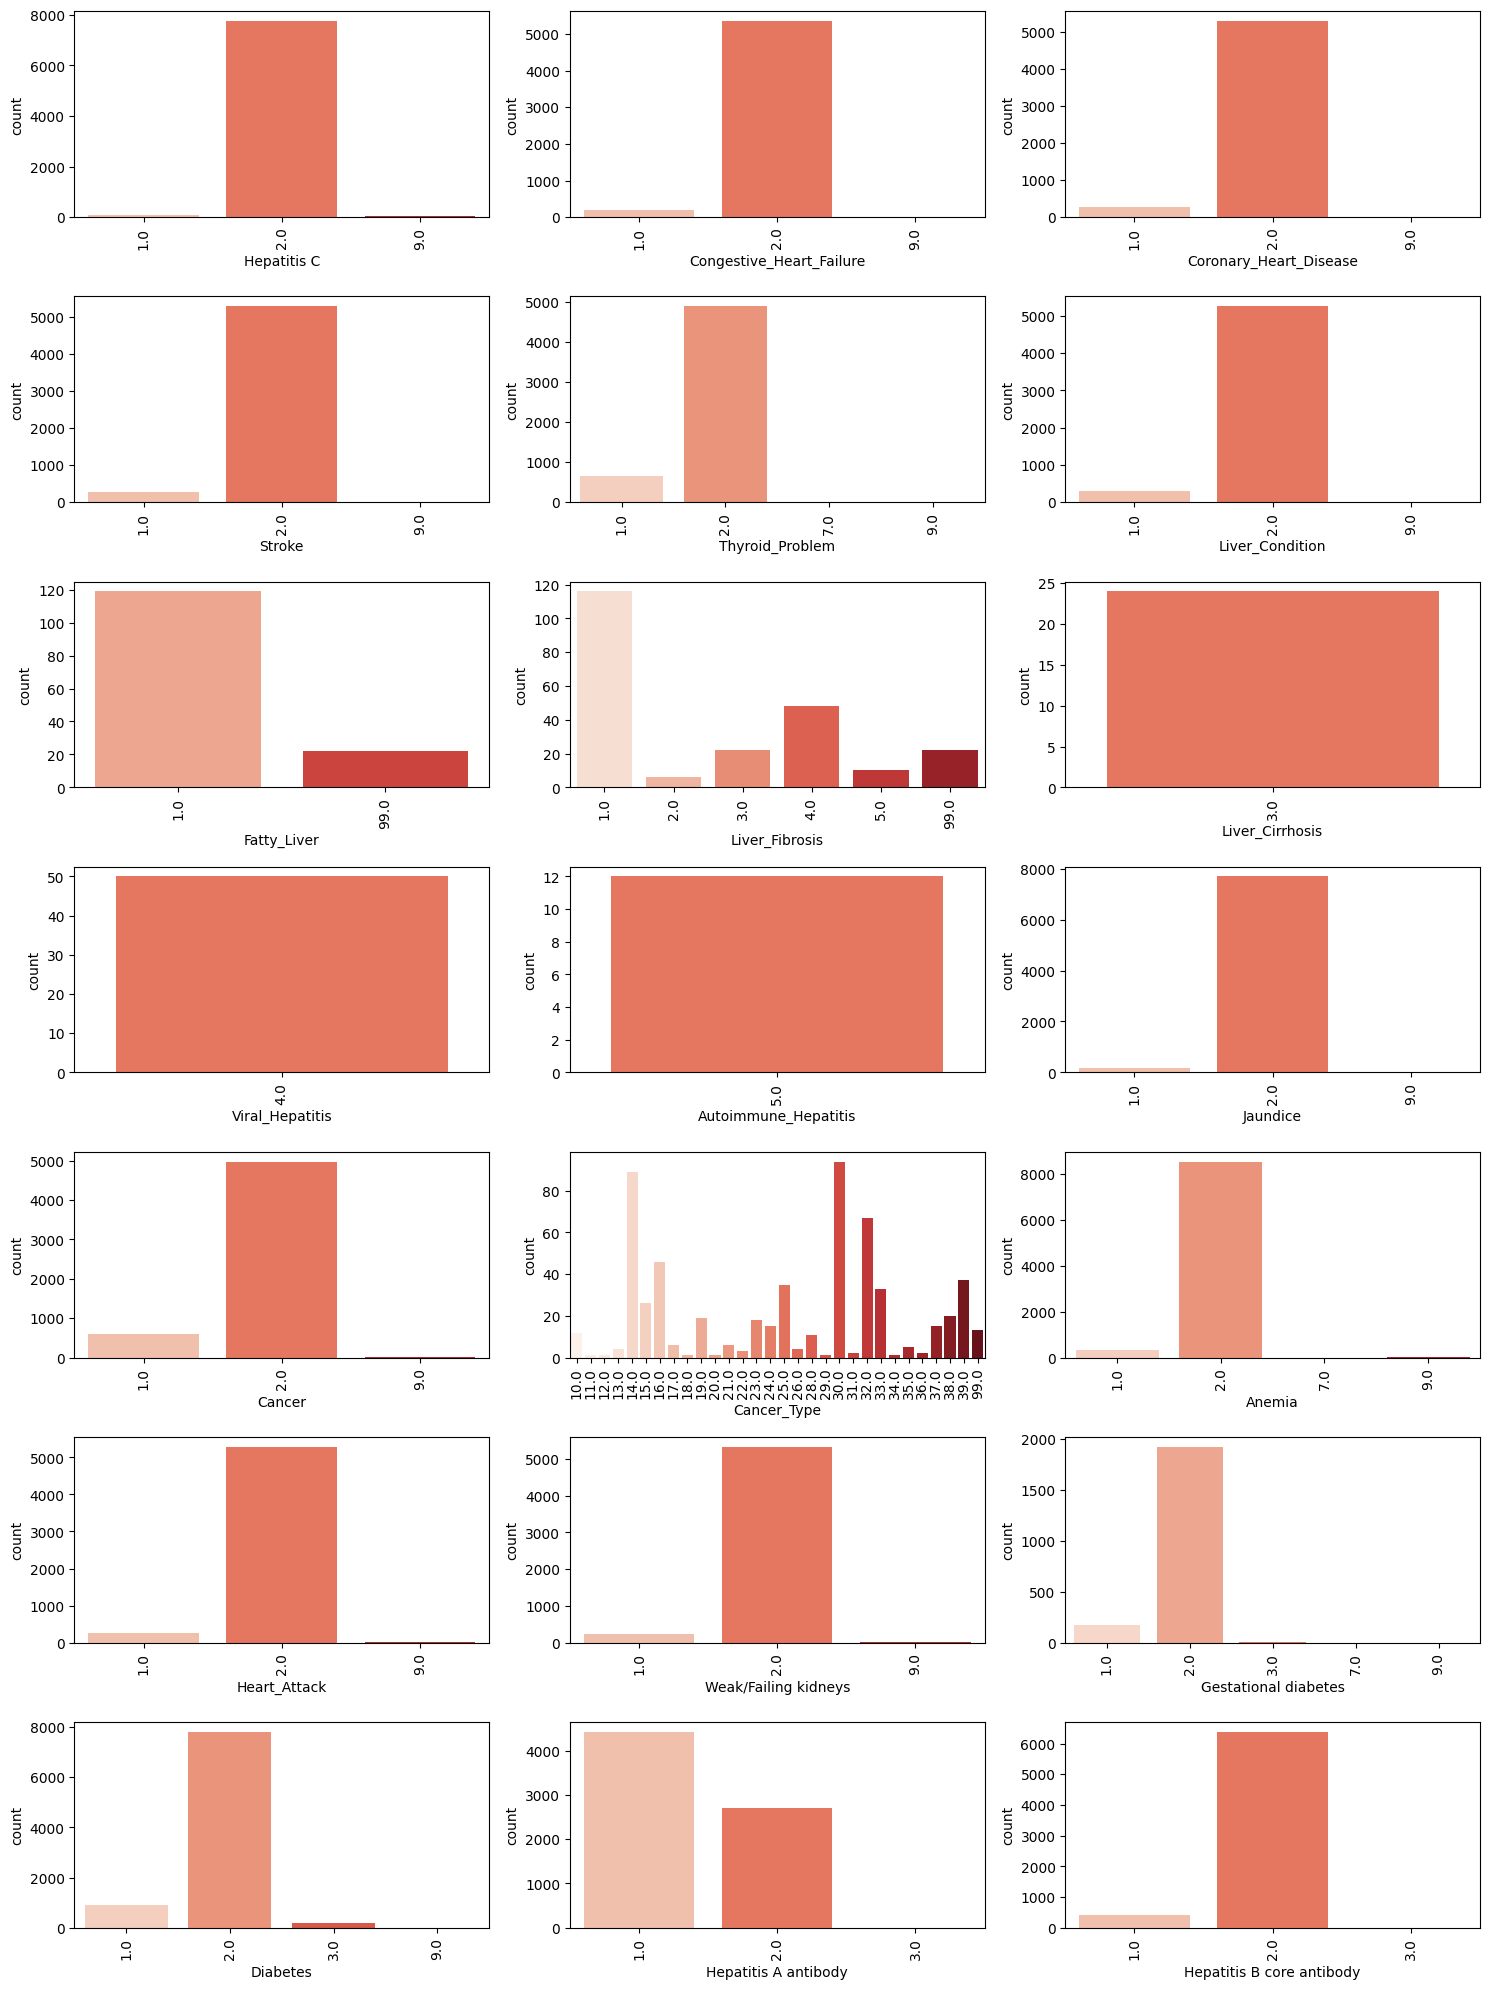

In [255]:
# Univariate analysis for disease data

num_plots = 22
num_rows = 7
num_cols = 3

# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))


for i, column in enumerate(q_df.drop('Respondent ID', axis=1).columns):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=q_df, x=column, ax=axes[row][col], palette='Reds')
    axes[row][col].set_xticklabels(axes[row][col].get_xticklabels(), rotation=90)
    
# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Here 1 denotes positive, 2 denotes negative and 99 or 9 denotes don't know etc.
# We can see that positive cases are always lower compared to negative cases
# Hence there are class imbalances
# We could oversample the data to eliminate class imbalance
# Also we have multiple classes like in cancer type
# And in Liver Cirrhosis, Viral Hepatitis and Autoimmune Hepatitis, there is just positive and null values
# (which is why the graphs are filled for these)

## Correlation Analysis

<AxesSubplot: >

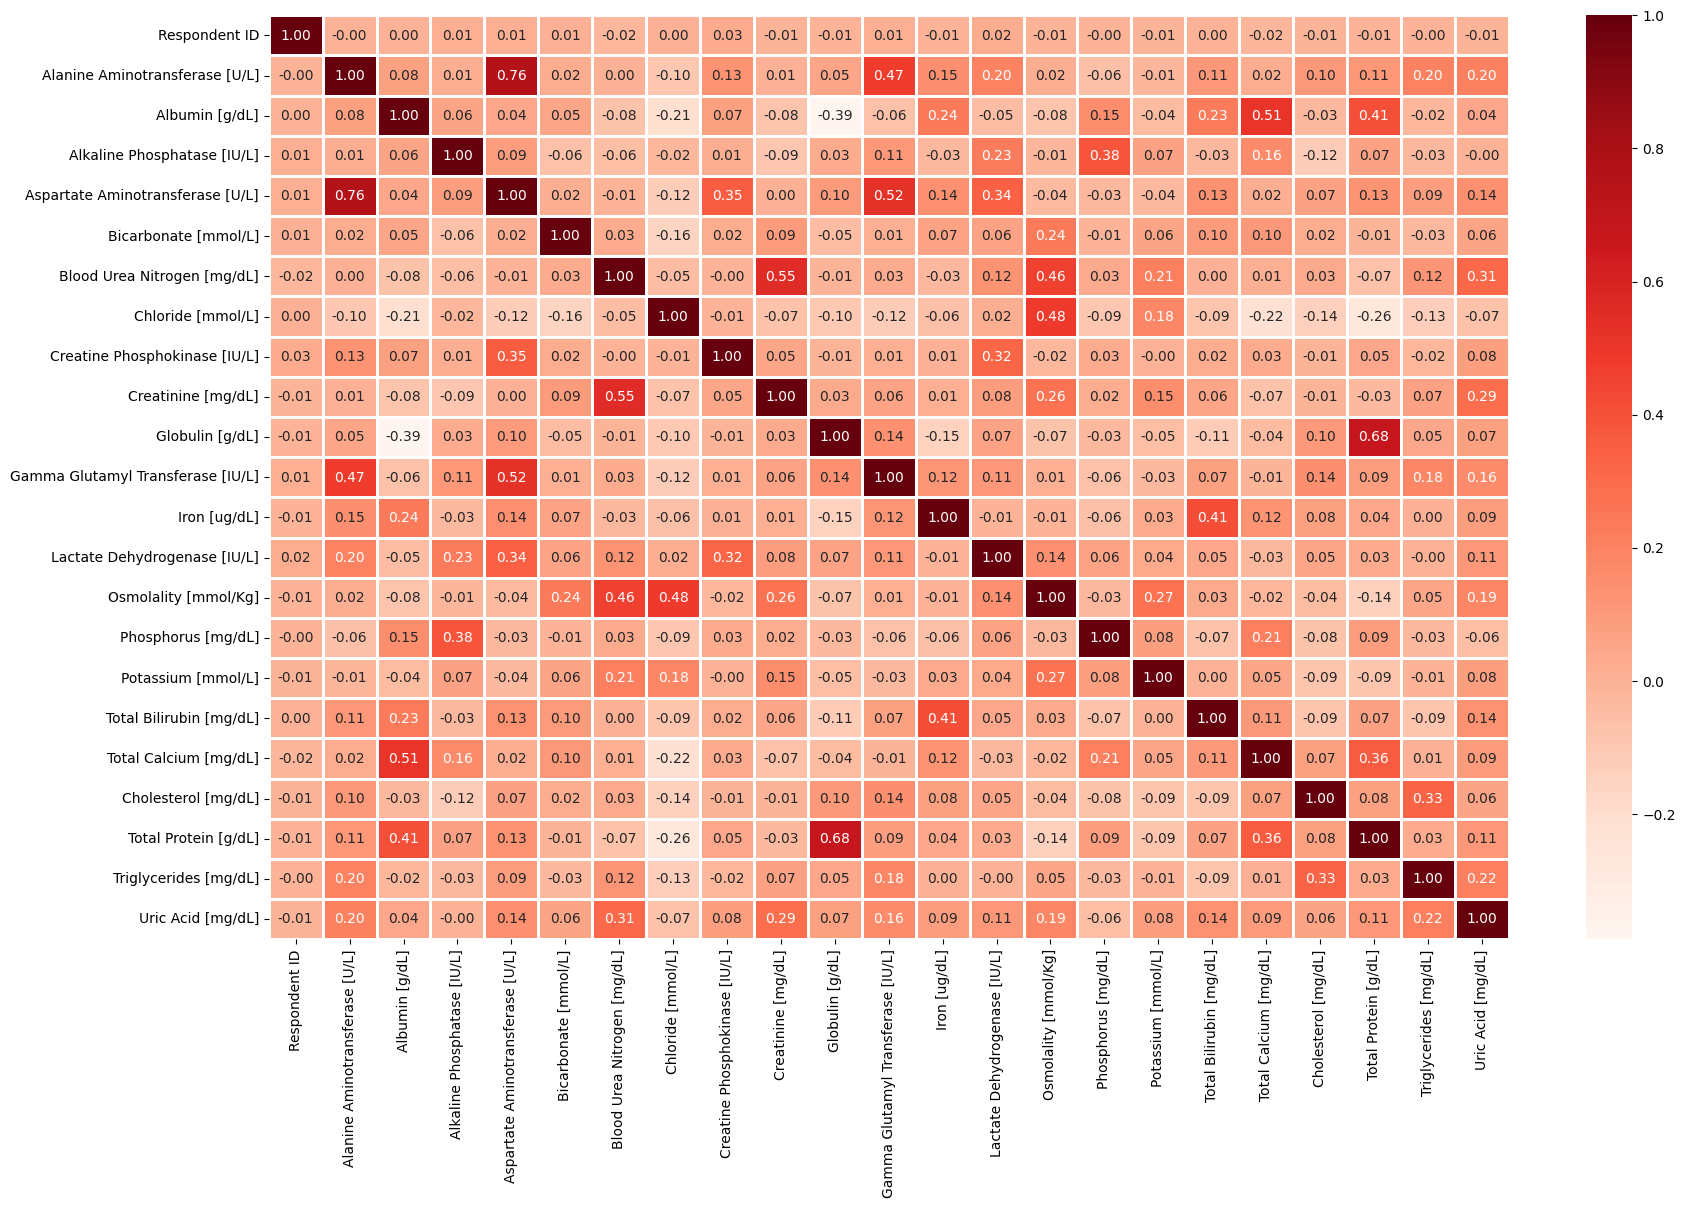

In [414]:
# Correlation between variables from Blood Standard Biochemistry Profile

plt.figure(figsize = (20, 12))
sns.heatmap(lab_dfs['BIOPRO_J'].corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

# We can see that some of the variables are correlated
# There are positive correlations like that between Alanine Aminotransferase and Aspartate Aminotransferase
# There are also negative correlations like that between Globulin and Albumin

<AxesSubplot: >

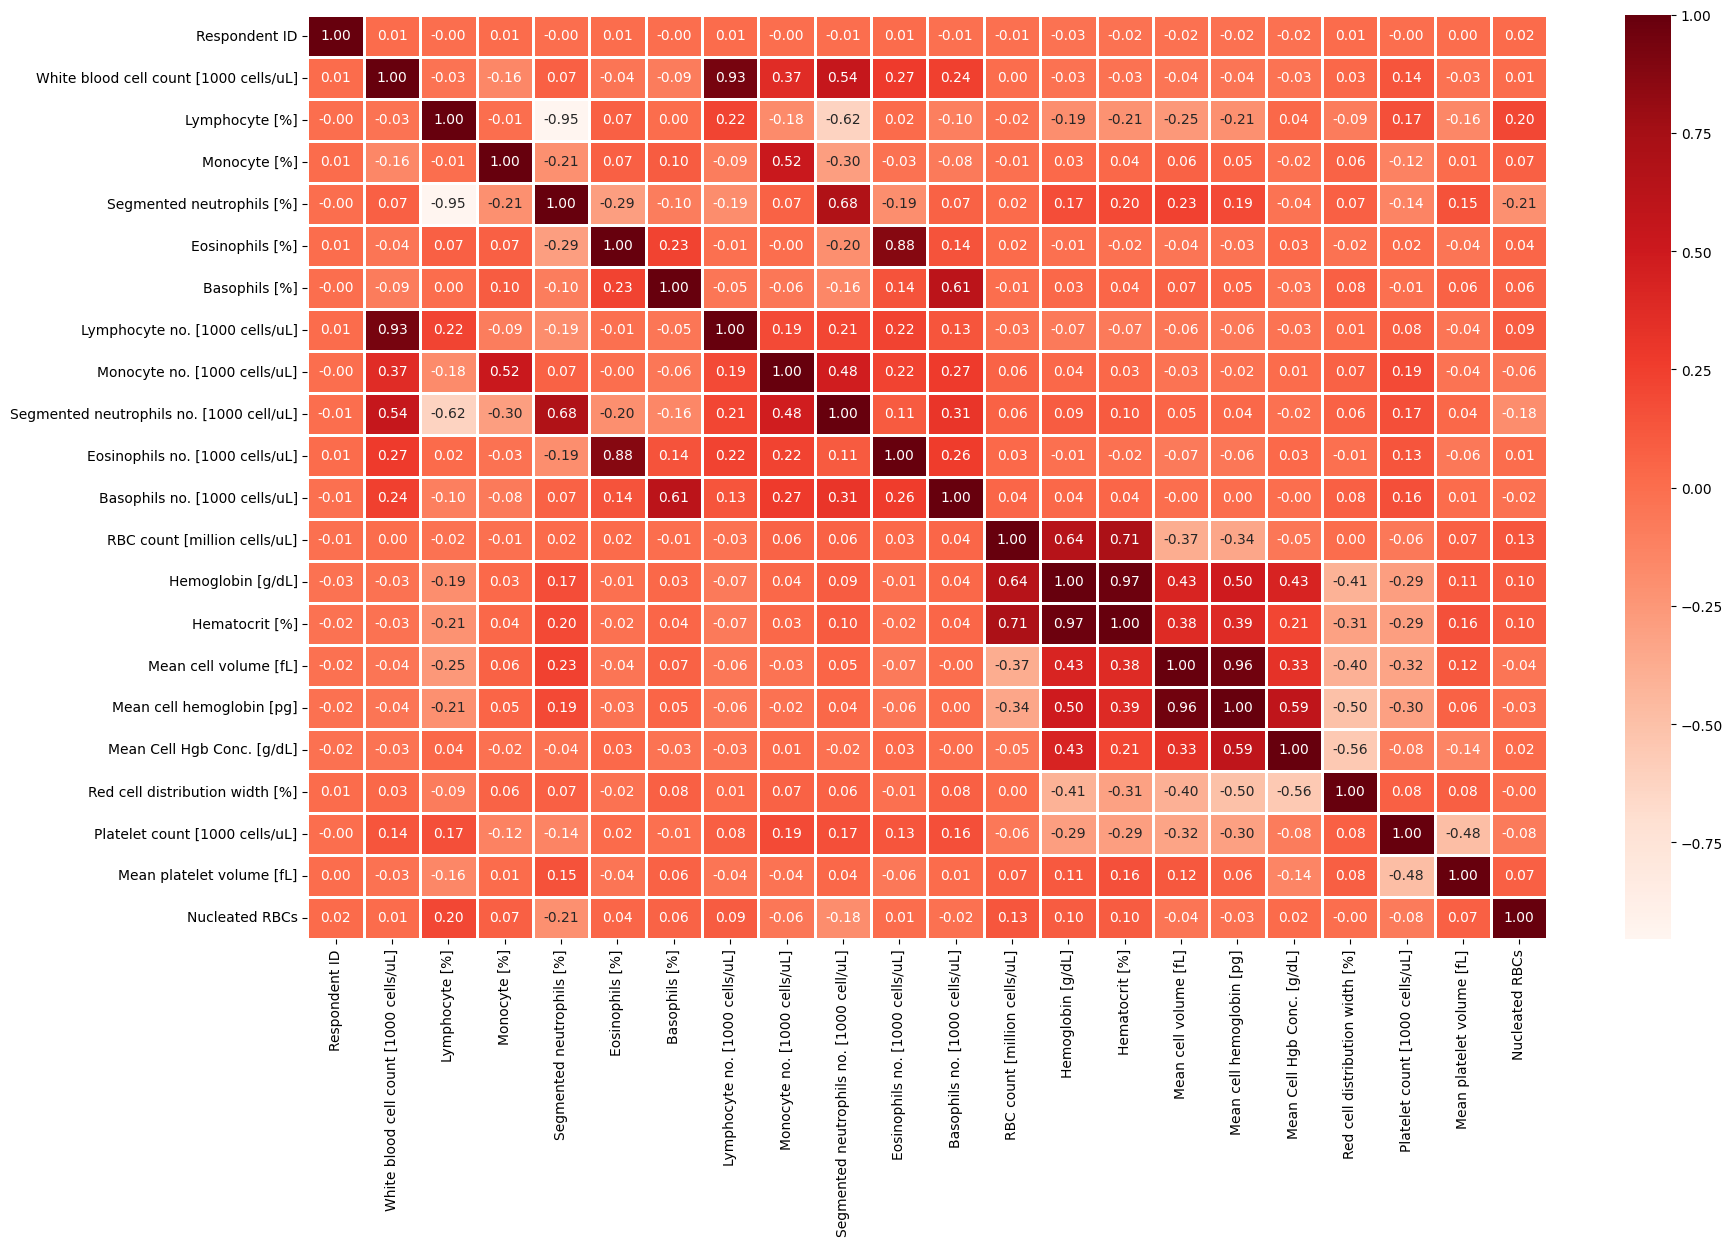

In [416]:
# Correlation between variables from Complete Blood Count

plt.figure(figsize = (20, 12))
sns.heatmap(lab_dfs['CBC_J'].corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

# These seem to be more correlated probably since there are percentage and count values of the same variable
# There are other correlations like a positive correlation between WBC count and Lymphocyte count
# Negative correlations exist too, like that between lymphocytes and segmented neutrophils

In [25]:
# Since some of the variables like lymphocyte, monocyte etc. have both percent and count, high correlation is found
# This may lead to multi-collinearity
# As the count can be derived from the percentage, we remove the count values

lab_df.drop(['Lymphocyte no. [1000 cells/uL]','Monocyte no. [1000 cells/uL]',
             'Segmented neutrophils no. [1000 cell/uL]',
             'Eosinophils no. [1000 cells/uL]', 'Basophils no. [1000 cells/uL]'], axis=1, inplace = True)

<AxesSubplot: >

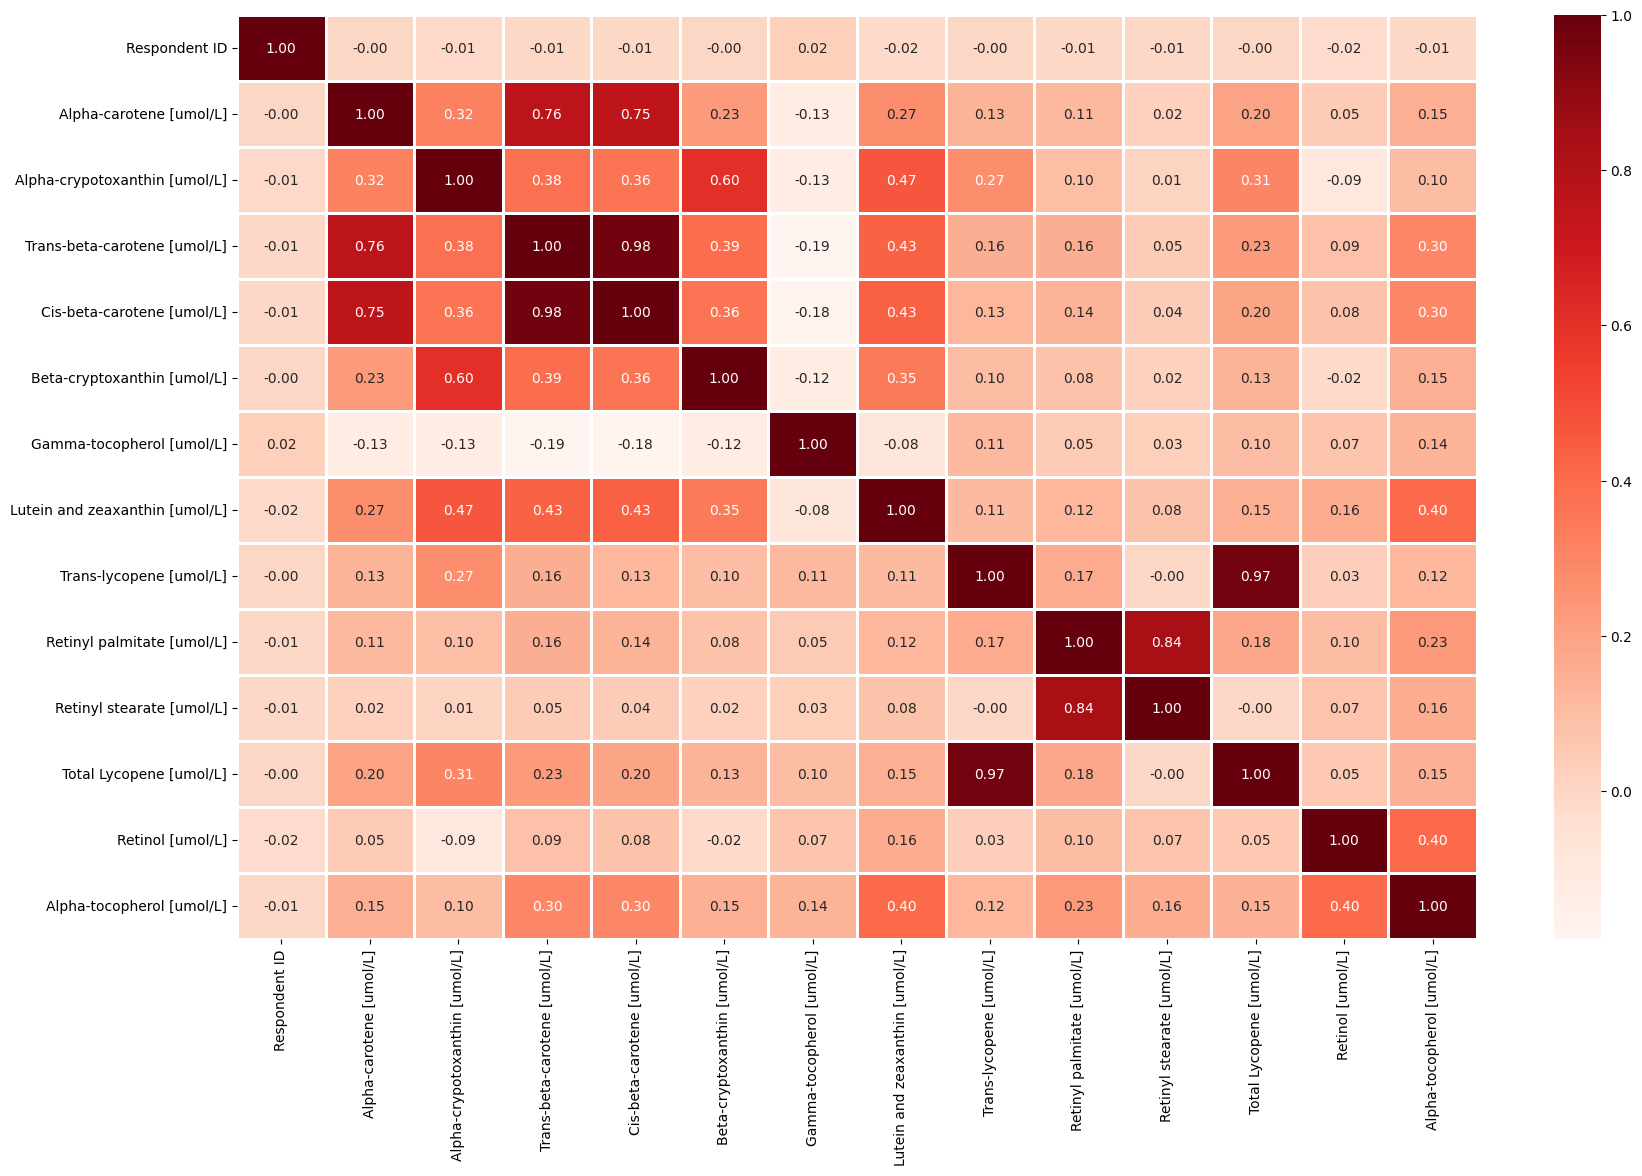

In [417]:
# Correlation between variables from Complete Blood Count

plt.figure(figsize = (20, 12))
sns.heatmap(lab_dfs['VITAEC_J'].corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

# We can notice some high correlation among trans-lycopene and total lycopene
# High Positive correlation between cis-beta carotene and trans-beta carotene
# We might have to remove some of the highly correlated variables while training to avoid multi-collinearity
# These insights from EDA shall guide us in feature selection and engineering

<AxesSubplot: >

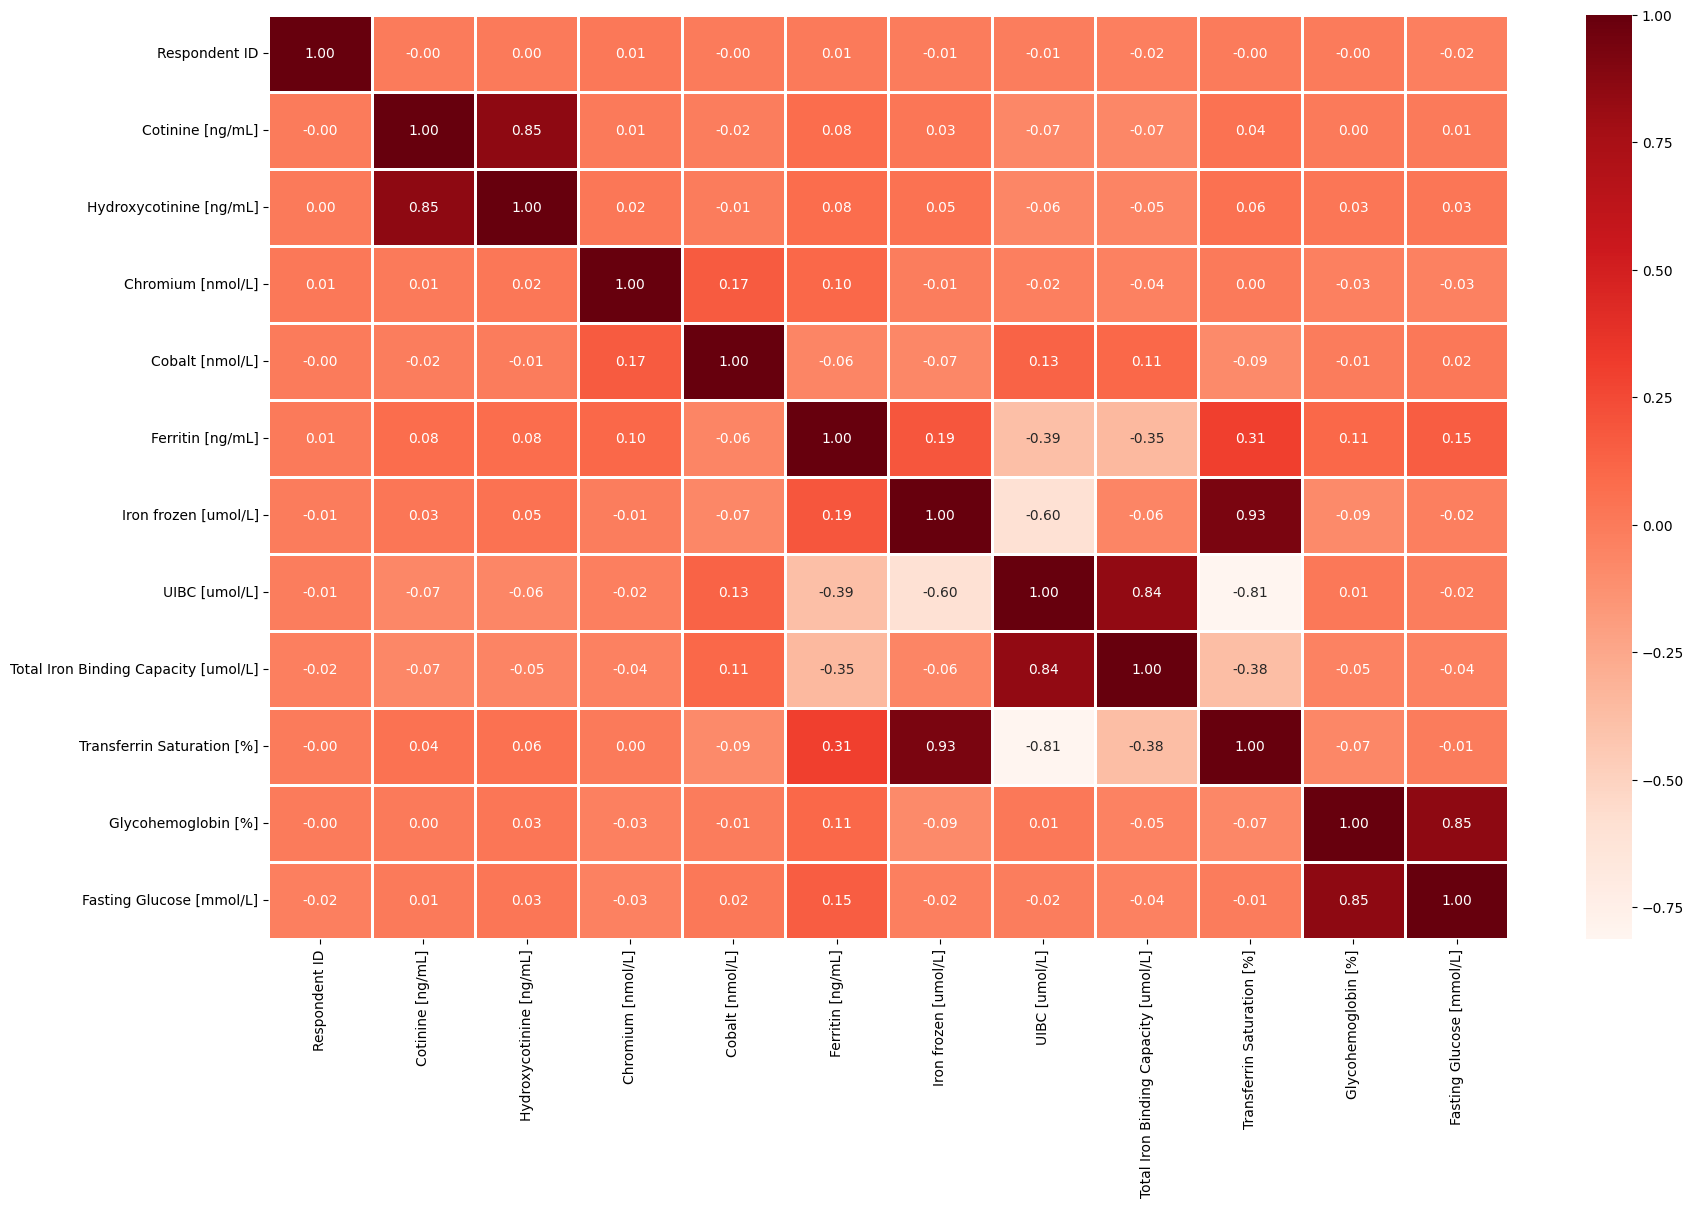

In [418]:
# Merging some files to check correlations

plt.figure(figsize = (20, 12))
clms = [lab_dfs['COT_J'],lab_dfs['CRCO_J'],lab_dfs['FERTIN_J'],
          lab_dfs['FETIB_J'],lab_dfs['GHB_J'],lab_dfs['GLU_J']]
mrg = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), clms)
sns.heatmap(mrg.corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

<AxesSubplot: >

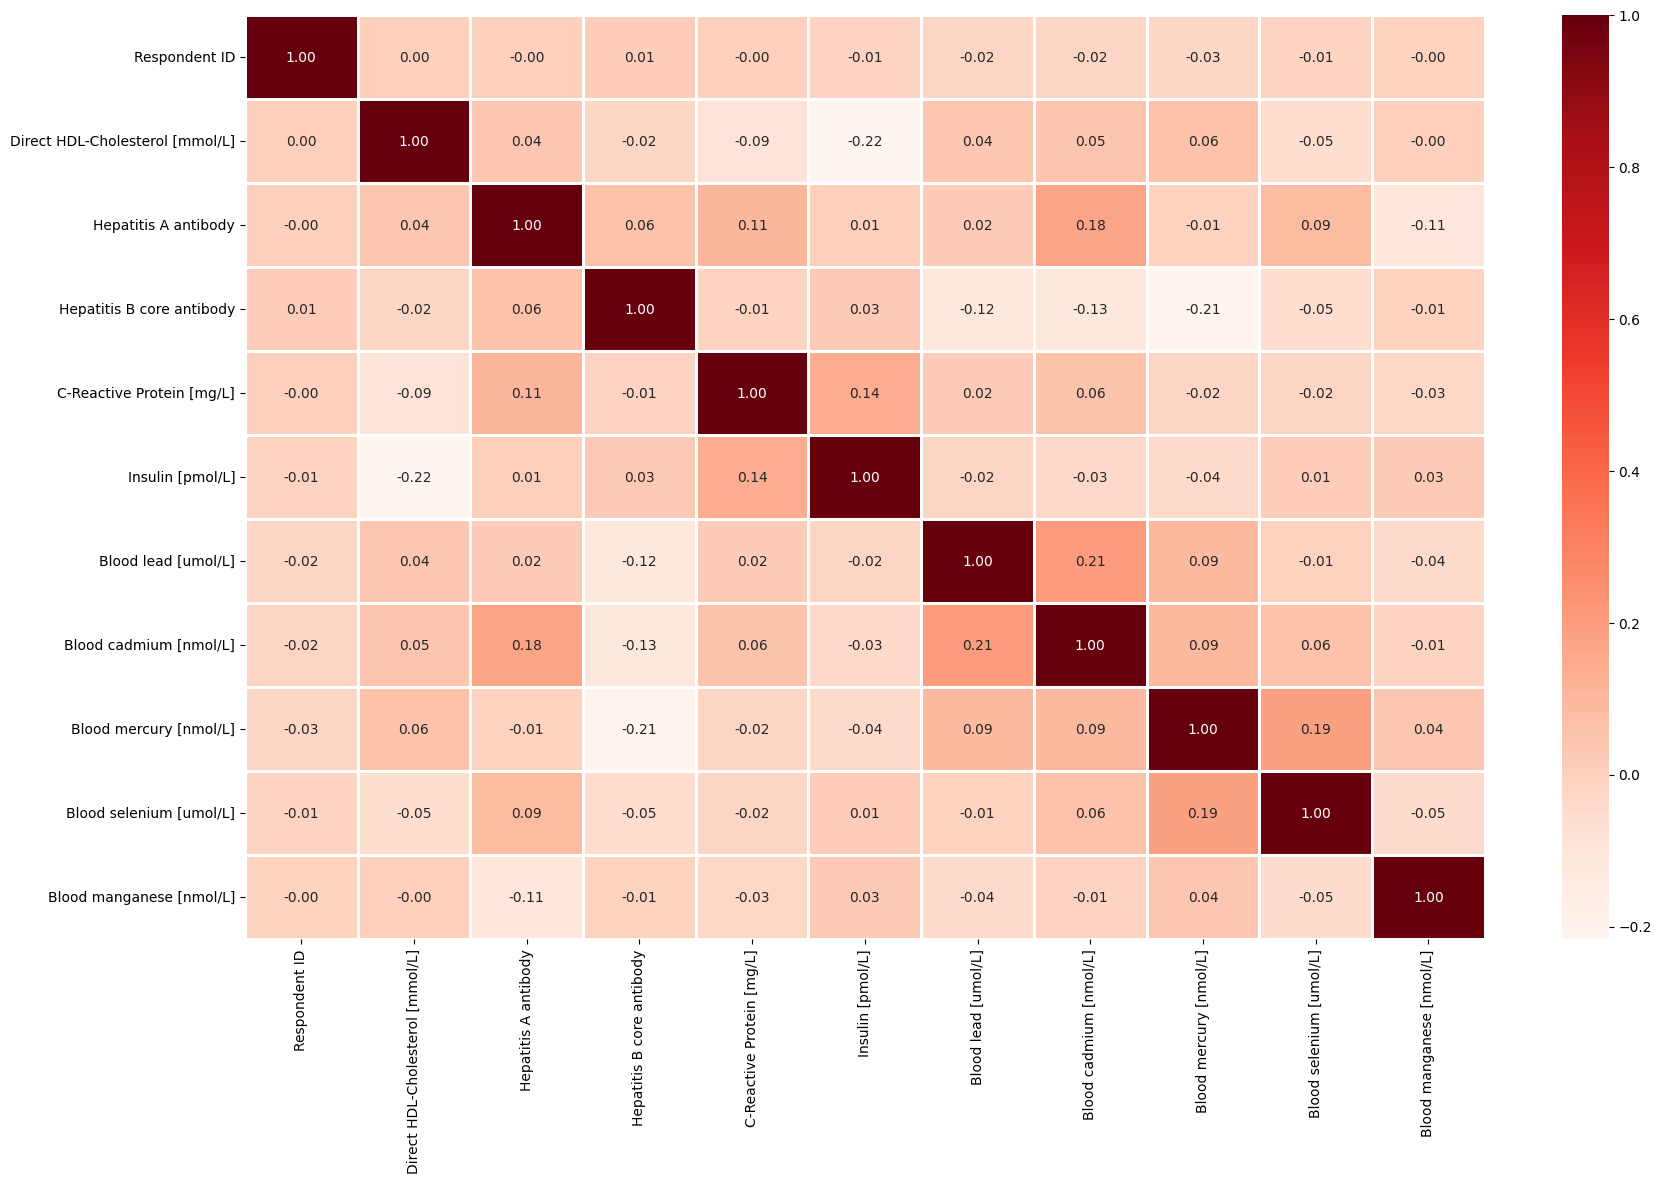

In [419]:
# Merging some files to check correlations

plt.figure(figsize = (20, 12))
clms2 = [lab_dfs['HDL_J'],lab_dfs['HEPA_J'],lab_dfs['HEPBD_J'],
          lab_dfs['HSCRP_J'],lab_dfs['INS_J'],lab_dfs['PBCD_J']]
mrg2 = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), clms2)
sns.heatmap(mrg2.corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

<AxesSubplot: >

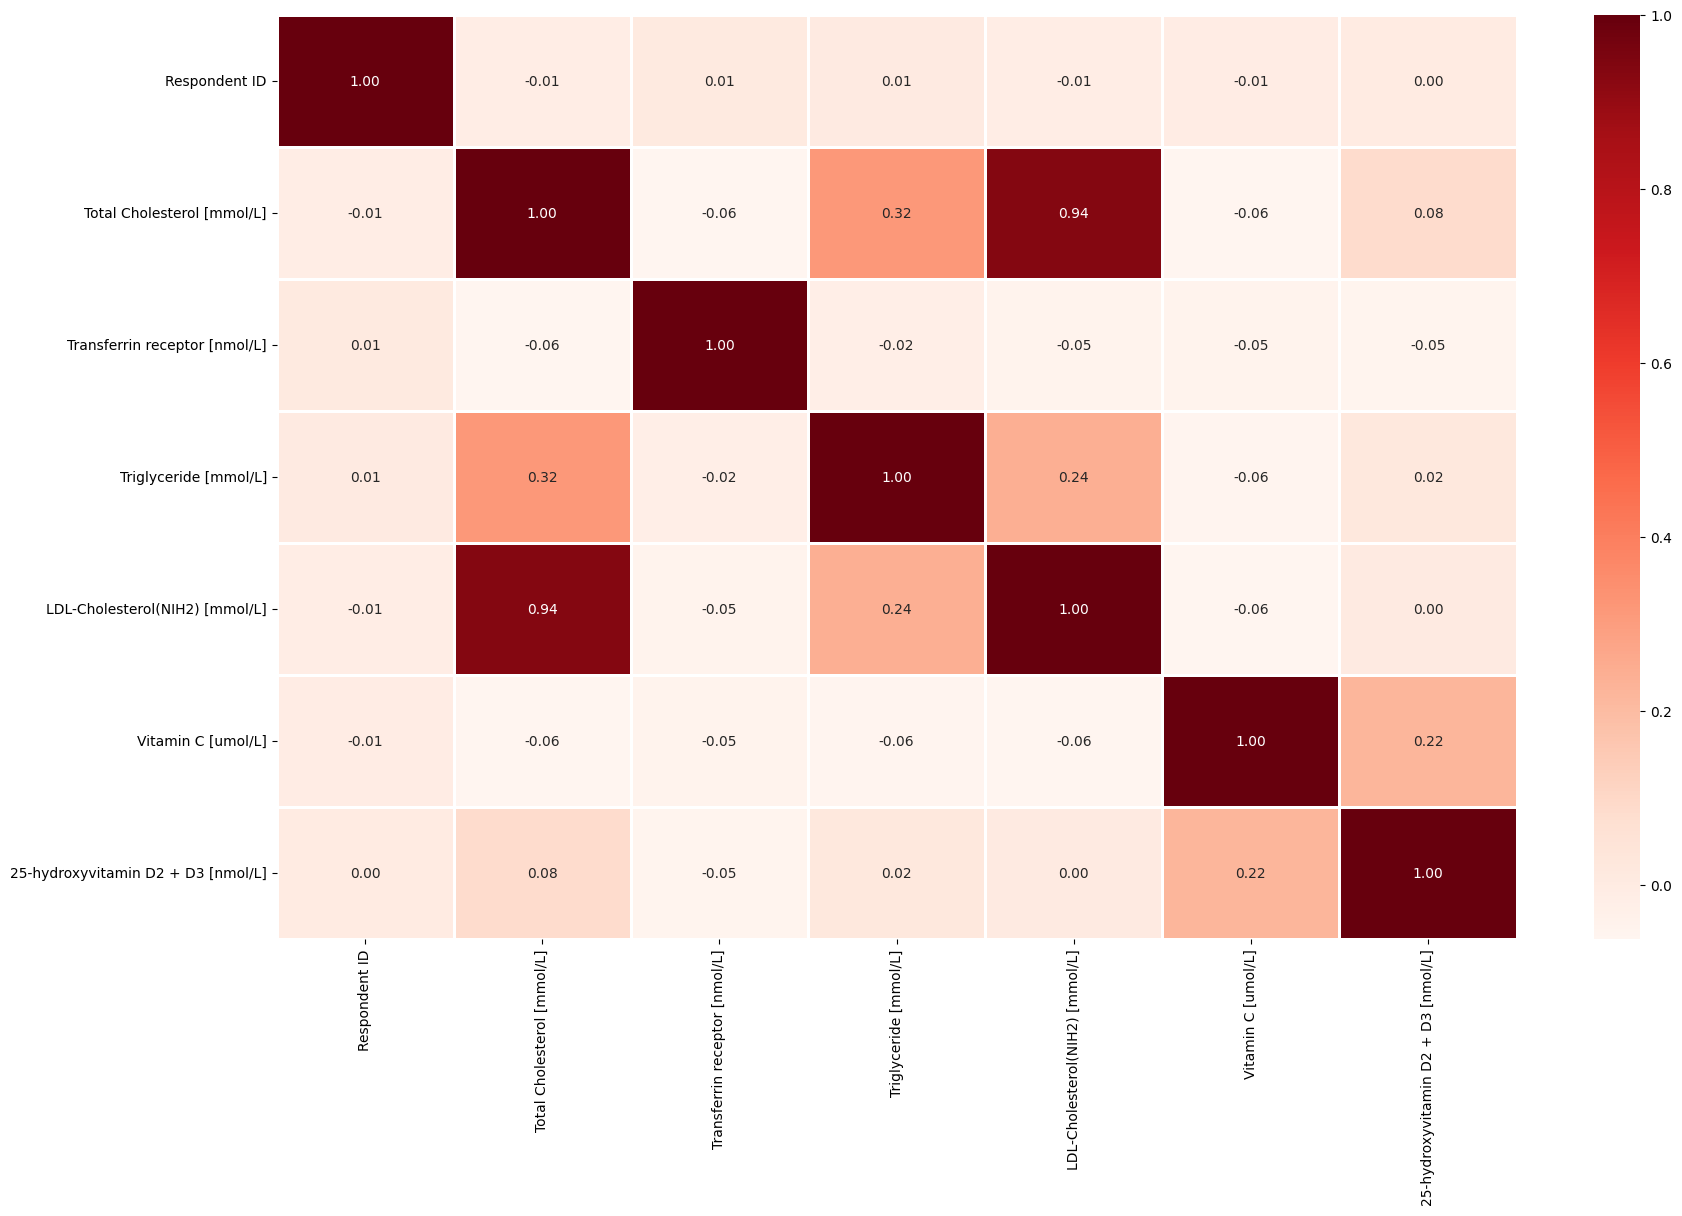

In [420]:
plt.figure(figsize = (20, 12))
clms3 = [lab_dfs['TCHOL_J'],lab_dfs['TFR_J'],lab_dfs['TRIGLY_J'],
          lab_dfs['VIC_J'],lab_dfs['VID_J']]
mrg3 = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), clms3)
sns.heatmap(mrg3.corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

<AxesSubplot: >

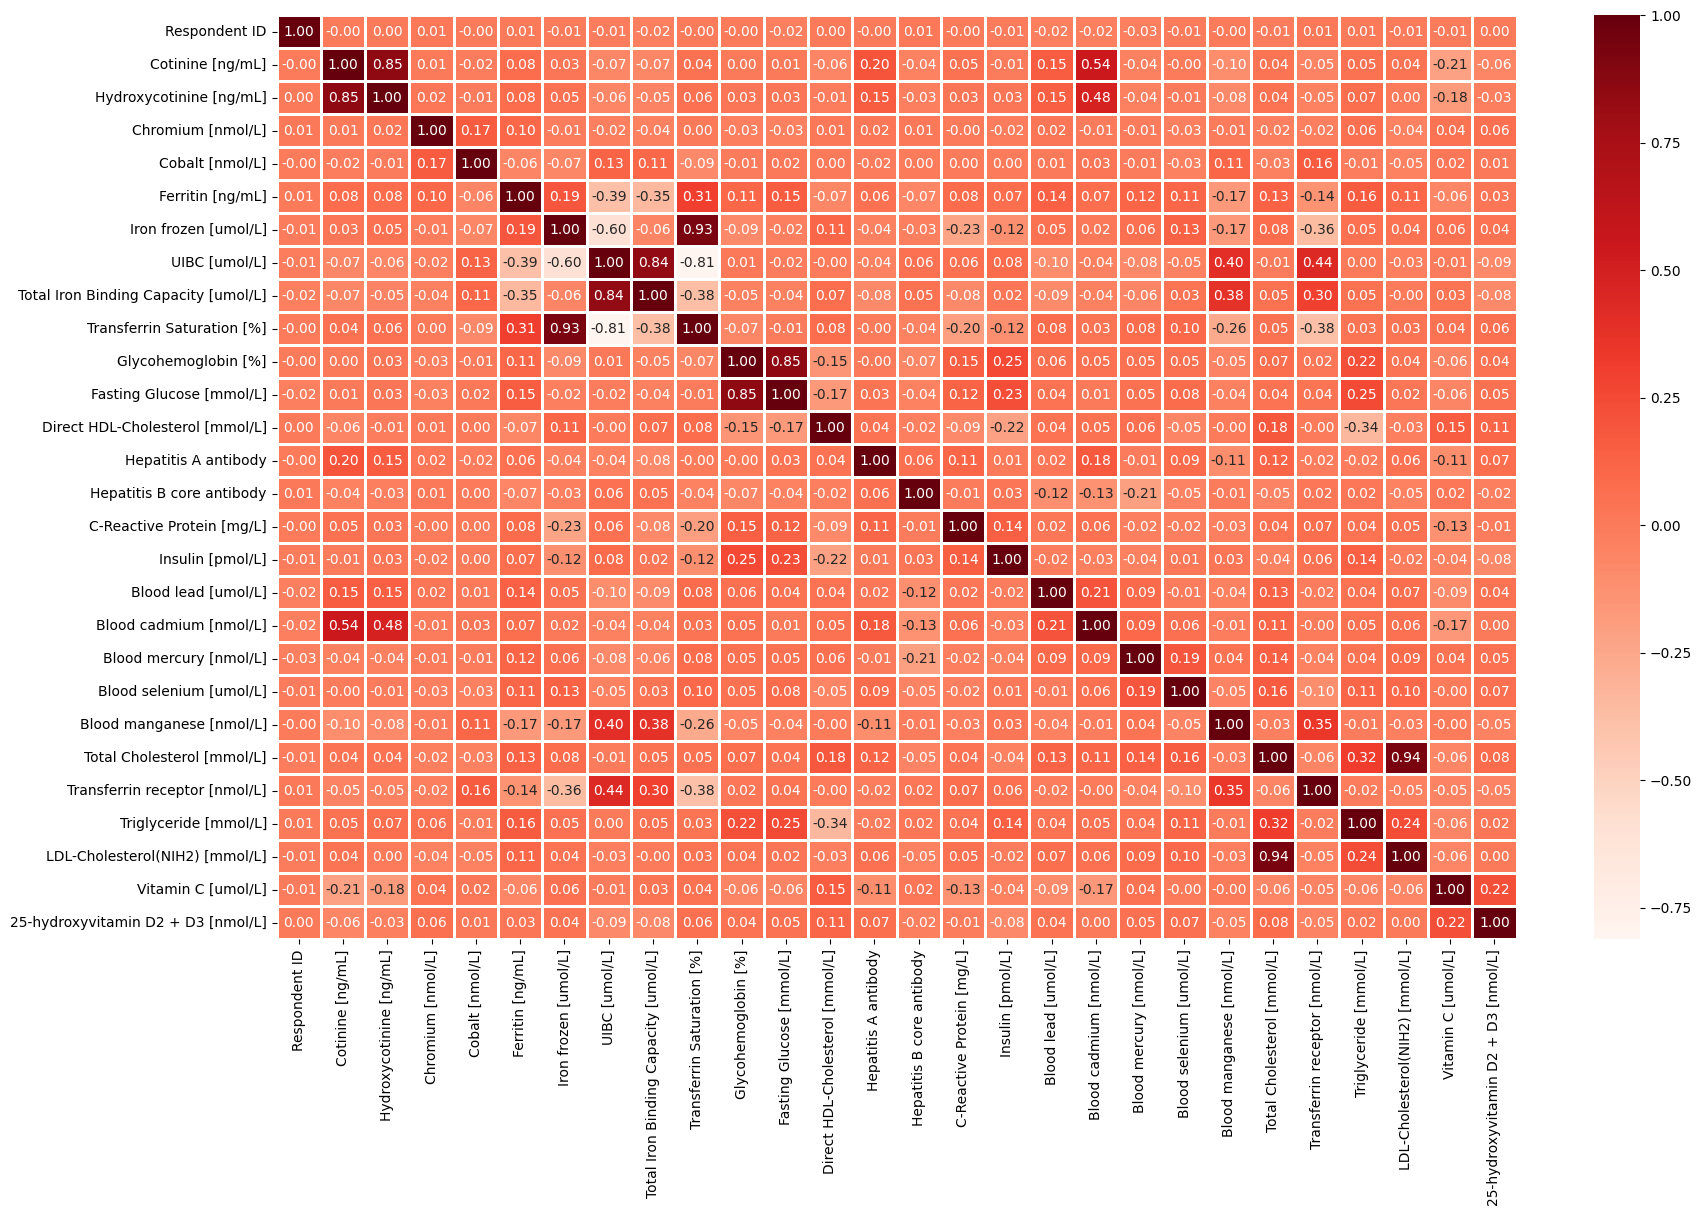

In [421]:
plt.figure(figsize = (20, 12))
clms4 = [mrg,mrg2,mrg3]
mrg4 = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), clms4)
sns.heatmap(mrg4.corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

<AxesSubplot: >

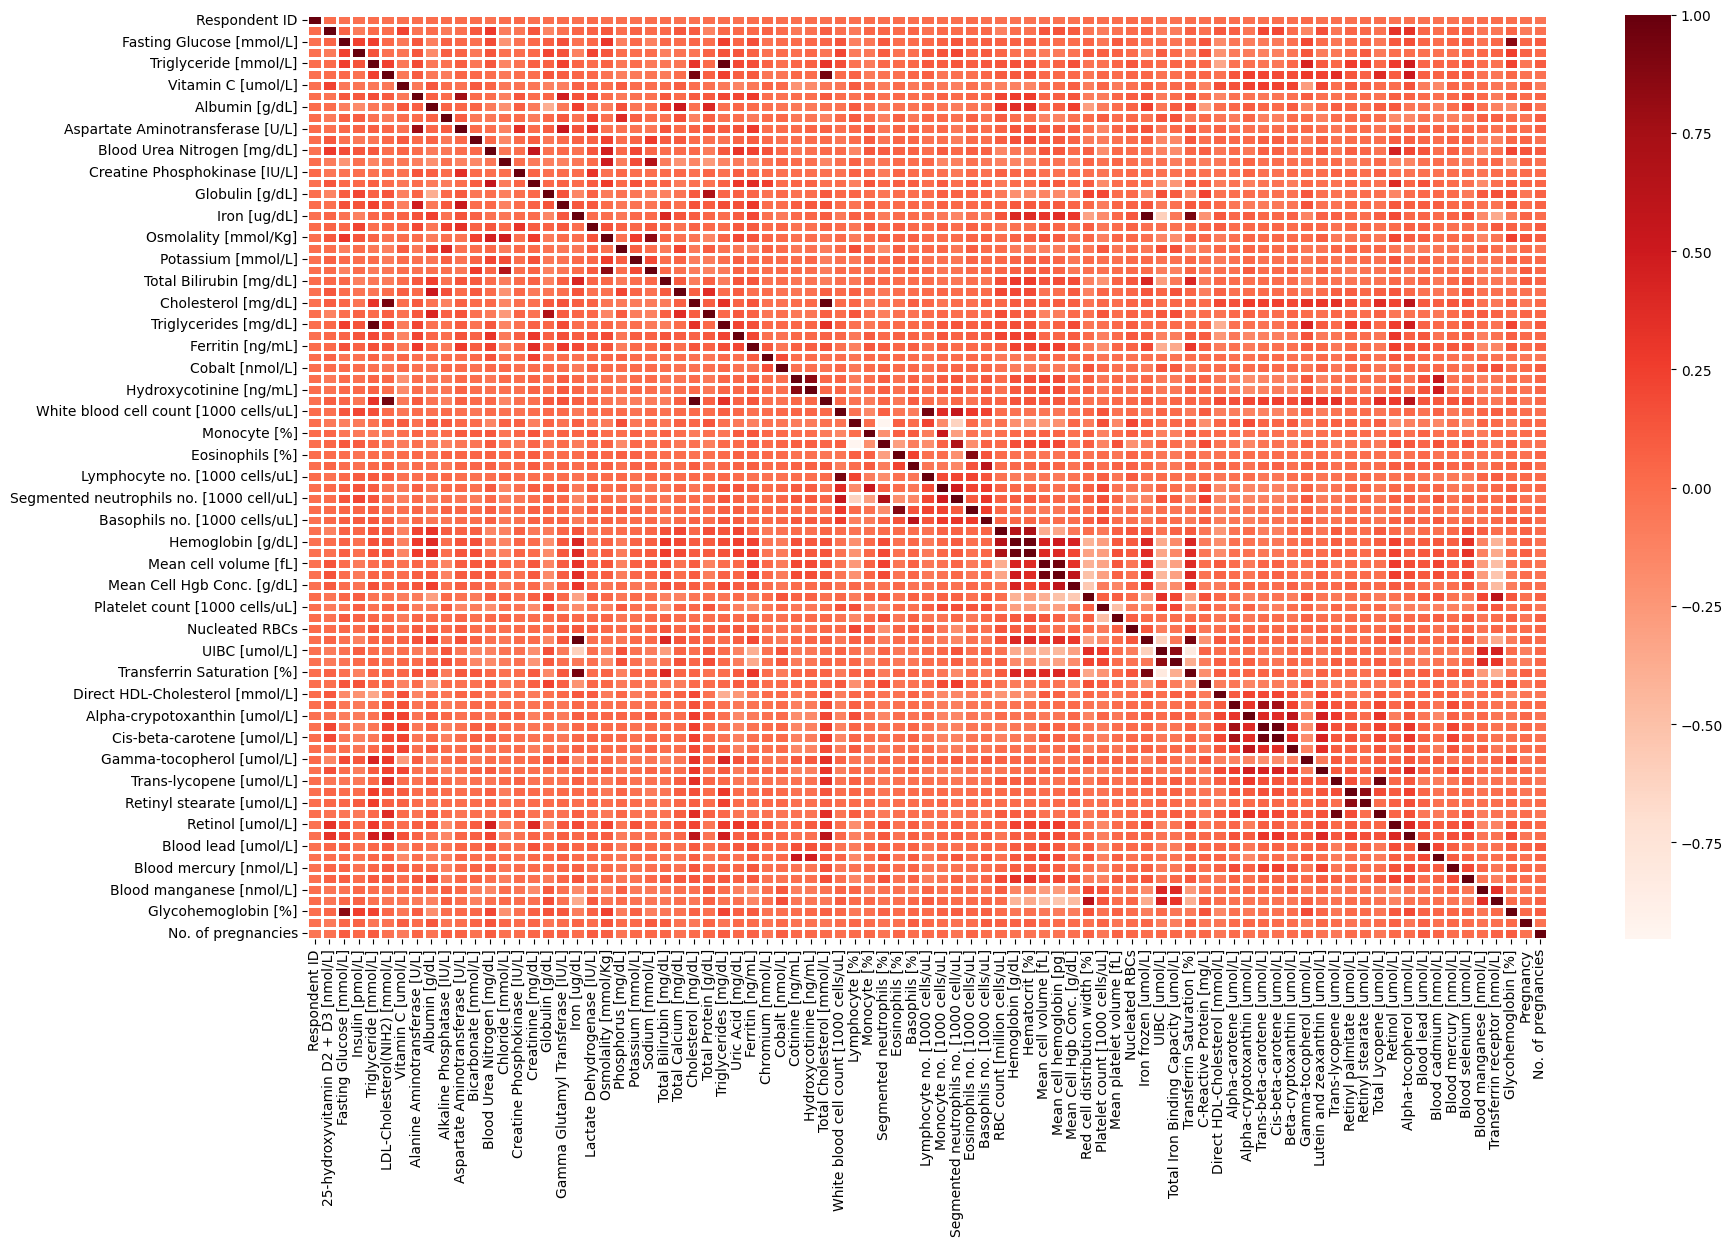

In [429]:
# Total Lab Data Correlation

plt.figure(figsize = (20, 12))
sns.heatmap(lab_df.corr(),cmap='Reds',linewidths = 0.8)

In [26]:
# We can see that Cholestrol appears twice, once as total cholestrol and once in Biochemistry profile
# They are highly correlated as well due to this
# So we remove the one from the Biochemistry profile (since NHANES doesn't recommend using this as well)

lab_df.drop('Cholesterol [mg/dL]',axis=1,inplace=True)

# Similar repetition also occurs for triglycerides
# We shall drop it as well

lab_df.drop('Triglycerides [mg/dL]',axis=1,inplace=True)

<AxesSubplot: >

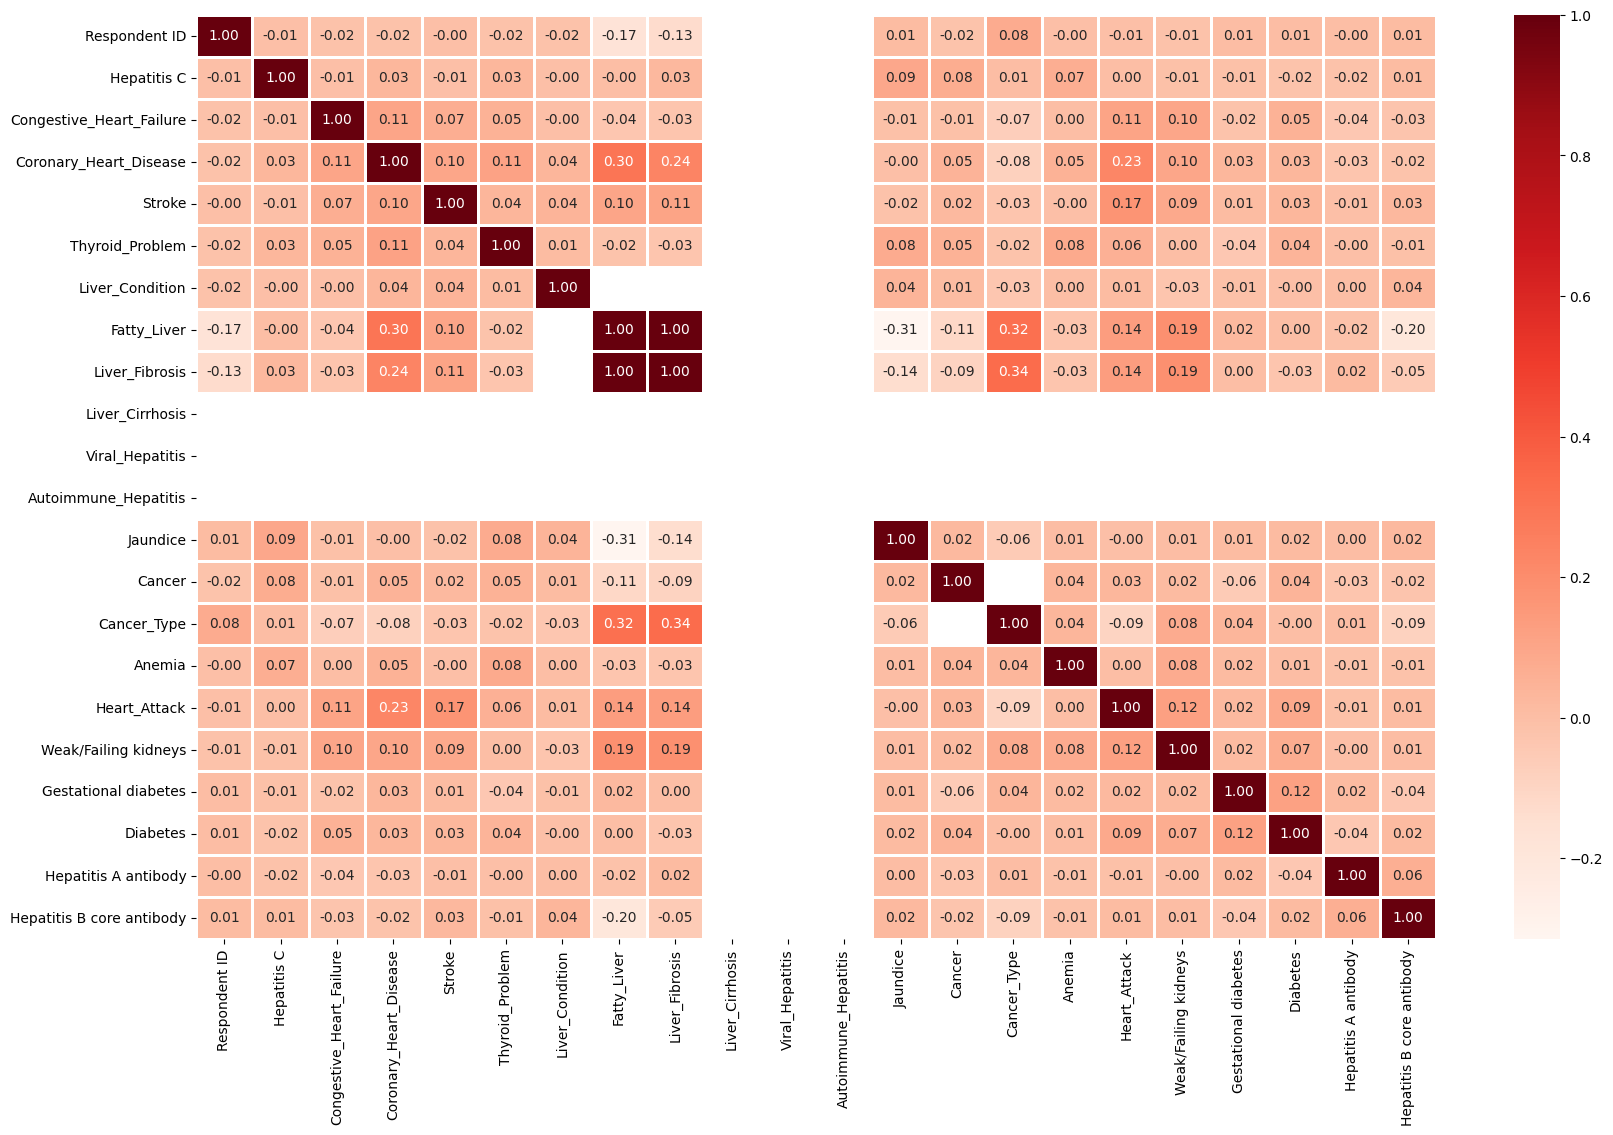

In [427]:
# Questionnaire data correlation
plt.figure(figsize = (20, 12))
sns.heatmap(q_df.corr(),cmap='Reds',linewidths = 1, annot = True, fmt = ".2f")

# The white in the middle is due to excess amount of null values
# We shall remove (or merge) these columns

In [60]:
# Merging all the dataframes to get a final dataframe with all the columns
dfs = [demo_df,ex_df,lab_df,q_df]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), dfs)

## Further Pre-Processing

In [61]:
# The diseases are filled with values of diagnosis
# However, there is a possibility that some people may be undiagnosed
# While we cannot diagnose all the diseases for any patient,
# we could use some domain knowledge to classify atleast some of the undiagnosed patients

# One disease where we could do this is Diabetes

final_df['Diabetes'].replace(9,np.NaN,inplace=True)        # 9 means don't know so we replace with null
final_df['Diabetes'].value_counts()

Diabetes
2.0    7816
1.0     893
3.0     184
Name: count, dtype: int64

In [62]:
# Now we have 3 classes 1-> Diabetic ; 2-> Not Daibetic ; 3-> Borderline/Pre-diabetic
# We use the domain knowledge that Fasting Glucose Level of 126 mg/dL (6.99 mmol/L) or above is diabetic 
# This helps us in assigning classes to people who are diabetic and "undiagnosed"

# Making a subset of the df to check for Diabetes
dbtc = final_df[['Respondent ID','Fasting Glucose [mmol/L]','Diabetes']].copy()

# Let us impute the null values of Fasting Glucose to check for Diabetes
dbtc['Fasting Glucose [mmol/L]'].fillna(dbtc['Fasting Glucose [mmol/L]'].mean(), inplace = True)

# Diabetic patients
dbtc = dbtc[(dbtc['Fasting Glucose [mmol/L]']>6.98)]

# Diabetic and undiagnosed
print("Undiagnosed diabetic patients = ",dbtc[dbtc['Diabetes']!=1].shape[0])

# Update the values of the Diabetes column accordingly
undiagnosed_dbtc = dbtc[(dbtc['Diabetes'] != 1) & (dbtc['Fasting Glucose [mmol/L]'] > 6.98)]

final_df.loc[undiagnosed_dbtc.index, 'Diabetes'] = 1

# We have some people on borderline. This we could classify as 1 since they are also at a risk of diabetes
final_df['Diabetes'] = np.where(final_df['Diabetes']==3,1,final_df['Diabetes'])

print('\nAfter updation:')
final_df['Diabetes'].value_counts()

Undiagnosed diabetic patients =  116

After updation:


Diabetes
2.0    7722
1.0    1171
Name: count, dtype: int64

In [63]:
# Now for Gestational Diabetes, the Fasting Glucose Level is above 100 mg/dl (5.55mmol/L)
# We can check for these values in 'pregnant' women and check for undiagnosed gestational diabetes

final_df['Gestational diabetes'].replace(9,np.NaN,inplace=True)
final_df['Gestational diabetes'].replace(7,np.NaN,inplace=True)

# Making a subset of the df to check for Gestational Diabetes
gstdb = final_df[['Respondent ID','Pregnancy','Fasting Glucose [mmol/L]','Gestational diabetes']].copy()

# Let us impute the null values of Fasting Glucose to check for Gestational Diabetes
gstdb['Fasting Glucose [mmol/L]'].fillna(gstdb['Fasting Glucose [mmol/L]'].mean(), inplace = True)

# Gestational Diabetic patients
gstdb = gstdb[(gstdb['Fasting Glucose [mmol/L]']>5.55)]

# Undiagnosed gestational diabetic
print("Undiagnosed gestational diabetic patients = ",
      gstdb[(gstdb['Pregnancy']==1)&(gstdb['Gestational diabetes']>1)].shape[0])

# Update the values of the gestational diabetic column accordingly
undiagnosed_gstdb = gstdb[(gstdb['Pregnancy'] == 1) & (gstdb['Fasting Glucose [mmol/L]'] > 5.55)]

final_df.loc[undiagnosed_gstdb.index, 'Gestational diabetes'] = 1

# We have 11 cases on borderline which we replace with 1
final_df['Gestational diabetes'] = np.where(final_df['Gestational diabetes']==3,1,final_df['Gestational diabetes'])

print('\nAfter updation:')
final_df['Gestational diabetes'].value_counts()

Undiagnosed gestational diabetic patients =  25

After updation:


Gestational diabetes
2.0    1898
1.0     213
Name: count, dtype: int64

In [64]:
# Since gesational diabetes only occurs during pregnancy,
# people who had gestational diabetes must have no. of pregnancy > 0
# We can check if there are any people with gestational diabetes and the number of pregnancies = 0 or null

print(final_df[(final_df['Gestational diabetes']==1)&(final_df['No. of pregnancies']==0)].shape[0])
print(final_df[(final_df['Gestational diabetes']==1)&(final_df['No. of pregnancies'].isnull())].shape[0])

0
0


In [65]:
# Other diseases cannot be diagnosed based on a single value
# So we just do basic pre-processing on them
# Like replacing the 'I don't know' (9) or 'Refused to answer'(7) values with null

# Anemia

final_df['Anemia'].replace(9,np.NaN,inplace=True)
final_df['Anemia'].replace(7,np.NaN,inplace=True)

final_df['Anemia'].value_counts()

Anemia
2.0    8543
1.0     339
Name: count, dtype: int64

In [66]:
# Weak/Failing Kidneys

final_df['Weak/Failing kidneys'].replace(9,np.NaN,inplace=True)

final_df['Weak/Failing kidneys'].value_counts()

Weak/Failing kidneys
2.0    5337
1.0     223
Name: count, dtype: int64

In [67]:
# Hepatitis A

final_df['Hepatitis A antibody'].replace(3,np.NaN,inplace=True)
final_df['Hepatitis A antibody'].value_counts()

Hepatitis A antibody
1.0    4424
2.0    2712
Name: count, dtype: int64

In [68]:
# Hepatitis B

final_df['Hepatitis B core antibody'].replace(3,np.NaN,inplace=True)
final_df['Hepatitis B core antibody'].value_counts()

Hepatitis B core antibody
2.0    6386
1.0     407
Name: count, dtype: int64

In [69]:
# Hepatitis C

final_df['Hepatitis C'].replace(9,np.NaN,inplace=True)
final_df['Hepatitis C'].value_counts()

Hepatitis C
2.0    7749
1.0      99
Name: count, dtype: int64

In [70]:
# Jaundice

final_df['Jaundice'].replace(9,np.NaN,inplace=True)
final_df['Jaundice'].value_counts()

Jaundice
2.0    7692
1.0     171
Name: count, dtype: int64

In [71]:
# Cancer

final_df['Cancer'].replace(9,np.NaN, inplace=True)
final_df['Cancer'].value_counts()

Cancer
2.0    4979
1.0     588
Name: count, dtype: int64

In [72]:
# Thyroid Problem

final_df['Thyroid_Problem'].replace(9,np.NaN,inplace=True)
final_df['Thyroid_Problem'].replace(7,np.NaN,inplace=True)
final_df["Thyroid_Problem"].value_counts()

Thyroid_Problem
2.0    4899
1.0     655
Name: count, dtype: int64

In [73]:
# Stroke

final_df['Stroke'].replace(9,np.NaN,inplace=True)
final_df['Stroke'].value_counts()

Stroke
2.0    5286
1.0     273
Name: count, dtype: int64

In [74]:
# Congestive Heart Failure

final_df['Congestive_Heart_Failure'].replace(9,np.NaN,inplace=True)
final_df["Congestive_Heart_Failure"].value_counts()

Congestive_Heart_Failure
2.0    5351
1.0     201
Name: count, dtype: int64

In [75]:
# Coronary Heart Disease

final_df['Coronary_Heart_Disease'].replace(9,np.NaN,inplace=True)
final_df['Coronary_Heart_Disease'].value_counts()

Coronary_Heart_Disease
2.0    5288
1.0     265
Name: count, dtype: int64

In [76]:
# Heart Attack

final_df['Heart_Attack'].replace(9,np.NaN,inplace=True)
final_df['Heart_Attack'].value_counts()

Heart_Attack
2.0    5289
1.0     270
Name: count, dtype: int64

In [77]:
# Cancer Type column contains the type of cancer of the patient
# It can either be considered for a multiclass classification for classifying the type of cancer
# Or we could assign 1 for cancer where there is a cancer type and 0 elsewhere
# But this is already present in the Cancer column
# So these may be dropped before training since the count for each type is low

print("People with a cancer type labelled 'Negative' in Cancer column =",
      final_df[(final_df['Cancer_Type']!=99)&(final_df['Cancer_Type'].notnull())&
               (final_df['Cancer']==2)].shape[0])

print('\nNon null values in Cancer_Type =',final_df['Cancer_Type'].notnull().sum())

final_df['Cancer_Type'].replace(99,np.NaN,inplace=True)

final_df['Cancer_Type'].value_counts()

# Each code in the Cancer_Type column represents a type of cancer (mentioned in NHANES documentation)

People with a cancer type labelled 'Negative' in Cancer column = 0

Non null values in Cancer_Type = 588


Cancer_Type
30.0    94
14.0    89
32.0    67
16.0    46
39.0    37
25.0    35
33.0    33
15.0    26
38.0    20
19.0    19
23.0    18
24.0    15
37.0    15
10.0    12
28.0    11
17.0     6
21.0     6
35.0     5
26.0     4
13.0     4
22.0     3
31.0     2
36.0     2
12.0     1
34.0     1
18.0     1
20.0     1
29.0     1
11.0     1
Name: count, dtype: int64

In [78]:
# Similar to the Cancer_Type column, we have types of liver diseases with codes
# But unlike the Cancer_Type column, they are spread across various columns

final_df["Liver_Condition"].replace(9,np.NaN,inplace=True)

print("No of non-null values in Autoimmune_Hepatitis: ",final_df["Autoimmune_Hepatitis"].notnull().sum())
print("No of non-null values in Fatty_Liver: ",final_df["Fatty_Liver"].notnull().sum())
print("No of non-null values in Liver_Cirrhosis: ",final_df["Liver_Cirrhosis"].notnull().sum())
print("No of non-null values in Liver_Fibrosis: ",final_df["Liver_Fibrosis"].notnull().sum())
print("No of non-null values in Viral_Hepatitis: ",final_df["Viral_Hepatitis"].notnull().sum())

# Since the number of non null values are too low
# We could give a 1 for Liver Condition if they have any one of those liver conditions
# And then drop these columns
# We check whether there are any values marked negative while these conditions are marked positive

print("\nLiver Condition marked 'Negative' while Autoimmune Hepatitits marked 'Positive' = ",
      final_df[(final_df["Autoimmune_Hepatitis"]==1)&(final_df["Liver_Condition"]==2)].shape[0])

print("Liver Condition marked 'Negative' while Fatty Liver marked 'Positive' = ",
      final_df[(final_df["Fatty_Liver"]==1)&(final_df["Liver_Condition"]==2)].shape[0])

print("Liver Condition marked 'Negative' while Liver Cirrhosis marked 'Positive' = ",
      final_df[(final_df["Liver_Cirrhosis"]==1)&(final_df["Liver_Condition"]==2)].shape[0])

print("Liver Condition marked 'Negative' while Liver Fibrosis marked 'Positive' = ",
      final_df[(final_df["Liver_Fibrosis"]==1)&(final_df["Liver_Condition"]==2)].shape[0])

print("Liver Condition marked 'Negative' while Viral Hepatitis marked 'Positive' = ",
      final_df[(final_df["Viral_Hepatitis"]==1)&(final_df["Liver_Condition"]==2)].shape[0])

# Since these columns provide no new information, we drop them
final_df.drop("Autoimmune_Hepatitis",axis=1,inplace=True)
final_df.drop("Fatty_Liver",axis=1,inplace=True)
final_df.drop("Liver_Cirrhosis",axis=1,inplace=True)
final_df.drop("Liver_Fibrosis",axis=1,inplace=True)
final_df.drop("Viral_Hepatitis",axis=1,inplace=True)

No of non-null values in Autoimmune_Hepatitis:  12
No of non-null values in Fatty_Liver:  141
No of non-null values in Liver_Cirrhosis:  24
No of non-null values in Liver_Fibrosis:  6
No of non-null values in Viral_Hepatitis:  50

Liver Condition marked 'Negative' while Autoimmune Hepatitits marked 'Positive' =  0
Liver Condition marked 'Negative' while Fatty Liver marked 'Positive' =  0
Liver Condition marked 'Negative' while Liver Cirrhosis marked 'Positive' =  0
Liver Condition marked 'Negative' while Liver Fibrosis marked 'Positive' =  0
Liver Condition marked 'Negative' while Viral Hepatitis marked 'Positive' =  0


In [79]:
# Now for some of the columns in the lab data

# Pregnancy
final_df['No. of pregnancies'].replace(9,np.NaN, inplace=True)

# No. of Pregnancies
final_df['No. of pregnancies'].replace(77,np.NaN, inplace=True)

In [80]:
# Removing the rows in the dataset for which all of the diseases have a null value

diseases = ['Congestive_Heart_Failure',
 'Coronary_Heart_Disease',
 'Stroke',
 'Thyroid_Problem',
 'Liver_Condition',
 'Jaundice',
 'Cancer',
 'Cancer_Type',
 'Anemia',
 'Heart_Attack',
 'Hepatitis C',
 'Gestational diabetes',
 'Diabetes',
 'Weak/Failing kidneys',
 'Hepatitis A antibody',
 'Hepatitis B core antibody']

final_df.dropna(subset = diseases, how = 'all', inplace = True)
final_df.shape

(8897, 97)

In [81]:
# We still have quite a lot of null values in the dataset
# We have more null values in the disease columns
# However, we cannot simply impute these values since they are categorical target variables
# So our only choices are to either merge similar columns or drop the null values
# After removing the null values, training will be done on the subsample, or we shall perform oversampling
# This is applicable to all diseases since they are categorical target variables

# On the other hand we can deal with null values in the lab data since most of these are numerical values
# Nonetheless, we shall save the dataframe with the null values and then proceed to impute them
# This is for the cases where some algorithms can factor in the missing values and learn the best imputation 
# values for the missing data based on the training loss reduction (like XGBoost)
# For the other cases, we shall use the imputed dataset

final_df.to_csv('../Dataset/final_df(with null).csv', index=False)

In [82]:
# Now let us remove the null values in the lab data
# In the lab dataset, the value of pregnancy cannot be imputed
# So we can just label all pregnant values as 1 and all else as 0

final_df['Pregnancy']=final_df.apply(lambda x: 1 if x.Pregnancy == 1 else 0, axis='columns')
print(final_df['Pregnancy'].value_counts())
print("\nNull values in 'Pregnancy': ",final_df['Pregnancy'].isnull().sum())

Pregnancy
0    8854
1      43
Name: count, dtype: int64

Null values in 'Pregnancy':  0


In [83]:
# Similarly in the case of pregnancy counts

final_df['No. of pregnancies'].fillna(0,inplace=True)
print(final_df['No. of pregnancies'].value_counts())
print("\nNull values in 'No. of pregnancies': ",final_df['No. of pregnancies'].isnull().sum())

No. of pregnancies
0.0     6798
3.0      479
2.0      478
4.0      350
1.0      267
5.0      264
6.0      125
7.0       73
8.0       35
11.0      18
10.0      10
Name: count, dtype: int64

Null values in 'No. of pregnancies':  0


In [84]:
# The rest of the variables in lab data are all blood biomarkers with numerical values
# We shall impute them to replace the null values
# We use Simple Imputer

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

# Getting all the columns that contain laboratory data
lab_cols = final_df.columns.intersection(lab_df.columns)

# Apply imputation to columns with numerical lab values
final_df[lab_cols] = imp.fit_transform(final_df[lab_cols])

# There are also some null values in the BMI column that has to be imputed
final_df['BMI'].fillna(final_df['BMI'].mean(), inplace = True)

final_df.head()

# final_df[lab_cols].isnull().sum().sum()  # -> 0

Respondent ID  Gender   Age   BMI  Chromium [nmol/L]  Cobalt [nmol/L]  \
0        93703.0     0.0   2.0  17.5           6.787297         3.653375   
1        93704.0     1.0   2.0  15.7           6.787297         3.653375   
2        93705.0     0.0  66.0  31.7           5.580000         3.390000   
3        93706.0     1.0  18.0  21.5           6.787297         3.653375   
4        93707.0     1.0  13.0  18.1           6.787297         3.653375   

   Ferritin [ng/mL]  Iron frozen [umol/L]  UIBC [umol/L]  \
0        133.394928             15.448058       43.34484   
1         36.600000             15.448058       43.34484   
2         28.700000             16.500000       41.73000   
3        284.000000             29.400000       27.76000   
4         49.300000             16.300000       60.89000   

   Total Iron Binding Capacity [umol/L]  ...  Cancer  Cancer_Type  Anemia  \
0                             58.796572  ...     NaN          NaN     2.0   
1                             58.796572  ...     NaN          NaN     2.0   
2                             58.210000  ...     2.0          NaN     2.0   
3                             57.130000  ...     NaN          NaN     2.0   
4                             77.190000  ...     NaN          NaN     2.0   

   Heart_Attack  Hepatitis C  Gestational diabetes  Diabetes  \
0           NaN          NaN                   NaN       2.0   
1           NaN          NaN                   NaN       2.0   
2           2.0          2.0                   2.0       2.0   
3           NaN          2.0                   NaN       2.0   
4           NaN          2.0                   NaN       2.0   

   Weak/Failing kidneys  Hepatitis A antibody  Hepatitis B core antibody  
0                   NaN                   NaN                        NaN  
1                   NaN                   1.0                        NaN  
2                   2.0                   1.0                        1.0  
3                   NaN                   2.0                        2.0  
4                   NaN                   2.0                        2.0  

[5 rows x 97 columns]

In [85]:
# Now that we have our cleaned dataset, we can export it.
# We still do have a null values in our dataset particularly in the diseases columns.
# But our only option would be to drop them
# But since dropping them altogether would lead to loss of valuable data, we shall keep them for now
# And then drop them selectively during training

final_df.shape

(8897, 97)

In [86]:
# saving the dataframe
final_df.to_csv('../Dataset/final_df.csv', index=False)